<a href="https://colab.research.google.com/github/daniel21211/TFM/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TFM DETECCIÓN DE ENFERMEDADES A TRAVÉS DE MODELOS DE CLASIFICACIÓN MULTICLASE APLICADOS A DATASETS DE MICROARNS EN BIOPSIAS LÍQUIDAS.**

#Carga de Datos

##*Importacion de Datos unificacion de Tablas*

In [ ]:
import pandas as pd

# Rutas a los archivos CSV en Google Colab
ruta_miRNA = '/content/miRNA_RCadj.xlsx'
ruta_metadata = '/content/metaData.xlsx'

# Cargar los datos desde los archivos CSV
df_miRNA = pd.read_excel(ruta_miRNA,header=0)
df_metadata = pd.read_excel(ruta_metadata)

# Mostrar las primeras filas para verificar que los datos se cargaron correctamente
print("Datos de miRNA:")
print(df_miRNA.head())

print("\nDatos de metadata:")
print(df_metadata.head())



Datos de miRNA:
  Experiment  hsa-miR-6850-3p  hsa-miR-4761-3p  hsa-miR-99b-3p  \
0  SRX258926                0                0             260   
1  SRX258927                0                0             350   
2  SRX258928                0                0            1796   
3  SRX258929                0                0            1768   
4  SRX258930                0                0              51   

   kshv-miR-K12-10a-3p  hsa-miR-3129-5p  ebv-miR-BART3-3p  hsa-miR-6820-5p  \
0                    0                0                 0                2   
1                    0                0                 0                0   
2                    0                0                 0                0   
3                    0                0                 0                0   
4                    0                0                 0                0   

   hsa-miR-4731-5p  hsa-miR-4423-3p  ...  hsa-miR-4423-5p  hsa-miR-6512-5p  \
0                0                0  ...

In [ ]:
# Reiniciar el índice de la tabla de datos de miRNA
df_miRNA_reset = df_miRNA.reset_index()

# Unir las tablas utilizando la columna 'Sample' como clave para la tabla de metadatos
# y la columna 'Experiment' como clave para la tabla de datos de miRNA
tabla_unificada = pd.merge(df_metadata, df_miRNA_reset, left_on='Experiment', right_on='Experiment', how='inner')

# Mostrar la tabla unificada
print(tabla_unificada)


      id        SRP          PRJ      Organism        Sample  \
0      0  SRP020486  PRJNA196121  Homo sapiens  SAMN01997249   
1      1  SRP020486  PRJNA196121  Homo sapiens  SAMN01997250   
2      2  SRP020486  PRJNA196121  Homo sapiens  SAMN01997251   
3      3  SRP020486  PRJNA196121  Homo sapiens  SAMN01997252   
4      4  SRP020486  PRJNA196121  Homo sapiens  SAMN01997253   
..   ...        ...          ...           ...           ...   
494  495  SRP098894  PRJNA371423  Homo sapiens  SAMN06299045   
495  496  SRP098894  PRJNA371423  Homo sapiens  SAMN06299044   
496  497  SRP098894  PRJNA371423  Homo sapiens  SAMN06299043   
497  498  SRP098894  PRJNA371423  Homo sapiens  SAMN06299042   
498  499  SRP098894  PRJNA371423  Homo sapiens  SAMN06299041   

                              Runs           Instrument    Release     Sex  \
0              SRR804662,SRR804663  Illumina HiSeq 2000 2013-05-16     NaN   
1    SRR804664,SRR804665,SRR804666  Illumina HiSeq 2000 2013-05-16     NaN 

#Tratamiento y Limpieza de Datos

Eliminacion columnas irrelevantes valores repetidos, información innecesaria

In [ ]:
# Eliminar las columnas no deseadas
columnas_a_eliminar = ['id', 'SRP', 'PRJ', 'Organism','Sample', 'Extraction','Runs', 'Release','Date','Experiment','Library']
df_procesado = tabla_unificada.drop(columns=columnas_a_eliminar)

# Mostrar el DataFrame procesado
print(df_procesado)


              Instrument     Sex   Fluid Healthy Cancer  Exosome  \
0    Illumina HiSeq 2000     NaN  plasma    True  False     True   
1    Illumina HiSeq 2000     NaN  plasma    True  False     True   
2    Illumina HiSeq 2000     NaN  plasma    True  False     True   
3    Illumina HiSeq 2000     NaN  plasma    True  False     True   
4    Illumina HiSeq 2000     NaN  plasma    True  False     True   
..                   ...     ...     ...     ...    ...      ...   
494          NextSeq 500  female   serum   False   True    False   
495          NextSeq 500  female   serum   False   True    False   
496          NextSeq 500  female   serum   False   True    False   
497          NextSeq 500  female   serum    True  False    False   
498          NextSeq 500  female   serum   False   True    False   

                Desc  index  hsa-miR-6850-3p  hsa-miR-4761-3p  ...  \
0                NaN      0                0                0  ...   
1                NaN      1                

**Quitamos todas las columnas cuyas proteinas son 0 en todas las muestras**

In [ ]:
# Obtener solo las columnas que no contienen solo ceros
df_procesado_filtrado = df_procesado.loc[:, (df_procesado != 0).any(axis=0)]

# Imprimir el nuevo DataFrame
print(df_procesado_filtrado)


              Instrument     Sex   Fluid Healthy Cancer  Exosome  \
0    Illumina HiSeq 2000     NaN  plasma    True  False     True   
1    Illumina HiSeq 2000     NaN  plasma    True  False     True   
2    Illumina HiSeq 2000     NaN  plasma    True  False     True   
3    Illumina HiSeq 2000     NaN  plasma    True  False     True   
4    Illumina HiSeq 2000     NaN  plasma    True  False     True   
..                   ...     ...     ...     ...    ...      ...   
494          NextSeq 500  female   serum   False   True    False   
495          NextSeq 500  female   serum   False   True    False   
496          NextSeq 500  female   serum   False   True    False   
497          NextSeq 500  female   serum    True  False    False   
498          NextSeq 500  female   serum   False   True    False   

                Desc  index  hsa-miR-6850-3p  hsa-miR-4761-3p  ...  \
0                NaN      0                0                0  ...   
1                NaN      1                

Eliminacion de valores NaN en la Columna Healthy salvo que en la columna Cancer sea True , caso contrario no sabremos si los datos proporcionados en sus muestras corresponden a una persona con o sin Cancer.

In [ ]:
import pandas as pd

# Supongo que ya tienes cargado df_procesado

# Reemplazar los valores faltantes en la columna Healthy con False si Cancer es True
df_procesado['Healthy'] = df_procesado.apply(lambda row: False if row['Cancer'] == True and pd.isna(row['Healthy']) else row['Healthy'], axis=1)

# Identificar y eliminar entradas de tipo función en la columna 'Desc'
df_procesado = df_procesado[df_procesado['Desc'].apply(lambda x: not callable(x))]

# Reemplazar los valores NA y aquellos que contienen 'Age:', 'control' o 'non-fatigued' por 'Healthy Control'
def replace_desc(desc):
    if pd.isna(desc) or 'Age:' in desc or desc == 'Control' or desc == 'non-fatigued':
        return 'Healthy Control'
    return desc

df_procesado['Desc'] = df_procesado['Desc'].apply(replace_desc)

# Eliminar las filas donde Healthy es NaN
df_procesado = df_procesado.dropna(subset=['Healthy'], how='all')

# Imprimir el nuevo DataFrame
print(df_procesado)



              Instrument     Sex   Fluid Healthy Cancer  Exosome  \
0    Illumina HiSeq 2000     NaN  plasma    True  False     True   
1    Illumina HiSeq 2000     NaN  plasma    True  False     True   
2    Illumina HiSeq 2000     NaN  plasma    True  False     True   
3    Illumina HiSeq 2000     NaN  plasma    True  False     True   
4    Illumina HiSeq 2000     NaN  plasma    True  False     True   
..                   ...     ...     ...     ...    ...      ...   
494          NextSeq 500  female   serum   False   True    False   
495          NextSeq 500  female   serum   False   True    False   
496          NextSeq 500  female   serum   False   True    False   
497          NextSeq 500  female   serum    True  False    False   
498          NextSeq 500  female   serum   False   True    False   

                Desc  index  hsa-miR-6850-3p  hsa-miR-4761-3p  ...  \
0    Healthy Control      0                0                0  ...   
1    Healthy Control      1                

**Eliminamos los valores que en ningun caso aportan informacion, para ello
identificamos las columnas cuyo valor maximo y minimo es 0**

In [ ]:
import numpy as np

# Eliminar las columnas no numéricas si las hay
df_procesado_numeric = df_procesado.select_dtypes(include=[np.number])

# Identificar las columnas con valores mínimos y máximos iguales a 0
columnas_a_eliminar = []
for columna in df_procesado_numeric.columns:
    if df_procesado_numeric[columna].min() == 0 and df_procesado_numeric[columna].max() == 0:
        columnas_a_eliminar.append(columna)

# Eliminar las columnas identificadas
df_procesado = df_procesado.drop(columnas_a_eliminar, axis=1)

# Imprimir el nuevo resumen
print(df_procesado.describe())


            index  hsa-miR-6850-3p  hsa-miR-4761-3p  hsa-miR-99b-3p  \
count  486.000000       486.000000       486.000000      486.000000   
mean   246.753086         0.010288         0.030864      636.430041   
std    145.445539         0.163395         0.259011      652.424969   
min      0.000000         0.000000         0.000000        0.000000   
25%    121.250000         0.000000         0.000000        2.000000   
50%    242.500000         0.000000         0.000000      427.000000   
75%    376.750000         0.000000         0.000000     1206.000000   
max    498.000000         3.000000         3.000000     2605.000000   

       hsa-miR-3129-5p  hsa-miR-6820-5p  hsa-miR-4731-5p  hsa-miR-136-5p  \
count       486.000000       486.000000       486.000000      486.000000   
mean          0.022634         0.104938         0.121399      141.238683   
std           0.225905         0.688114         1.123174      198.822276   
min           0.000000         0.000000         0.000000

#Visualizacion y Analisis de Datos

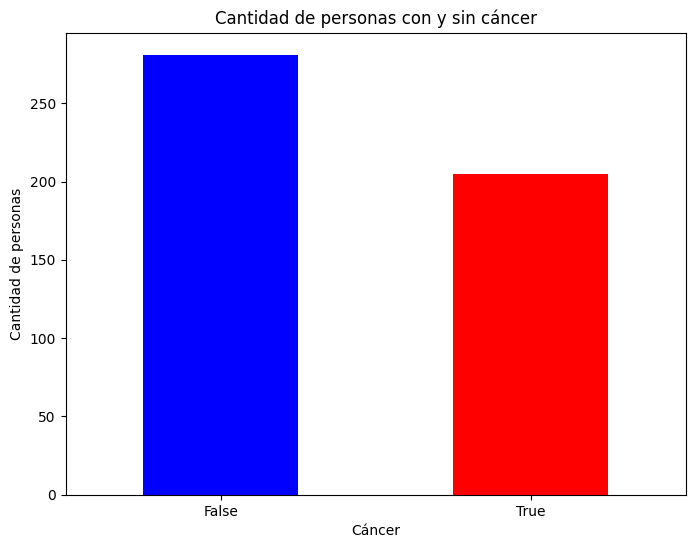

In [ ]:
import matplotlib.pyplot as plt

# Calcular el recuento de personas con y sin cáncer
cancer_counts = df_procesado['Cancer'].value_counts()

# Visualización con un gráfico de barras
plt.figure(figsize=(8, 6))
cancer_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Cantidad de personas con y sin cáncer')
plt.xlabel('Cáncer')
plt.ylabel('Cantidad de personas')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()


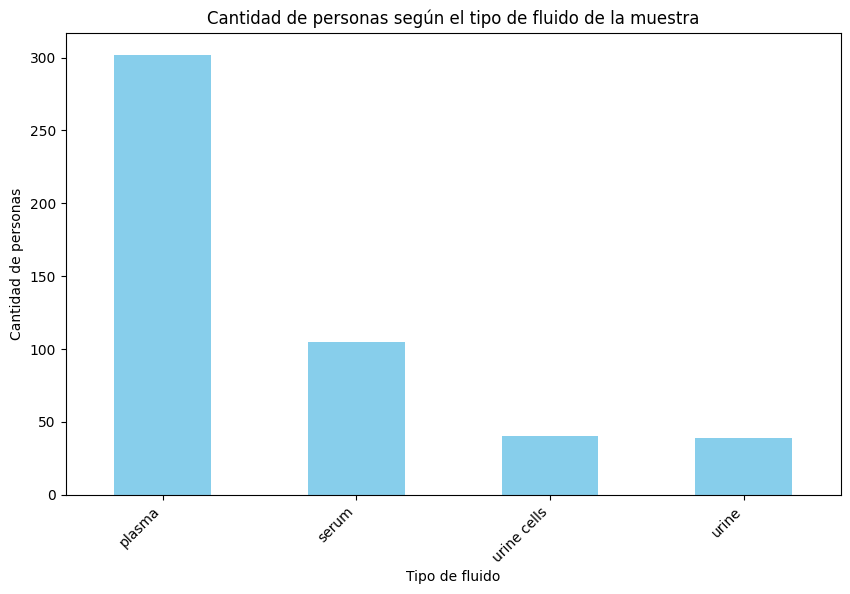

In [ ]:
import matplotlib.pyplot as plt

# Calcular el recuento de personas para cada tipo de fluido
fluid_counts = df_procesado['Fluid'].value_counts()

# Visualización con un gráfico de barras
plt.figure(figsize=(10, 6))
fluid_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de personas según el tipo de fluido de la muestra')
plt.xlabel('Tipo de fluido')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.show()



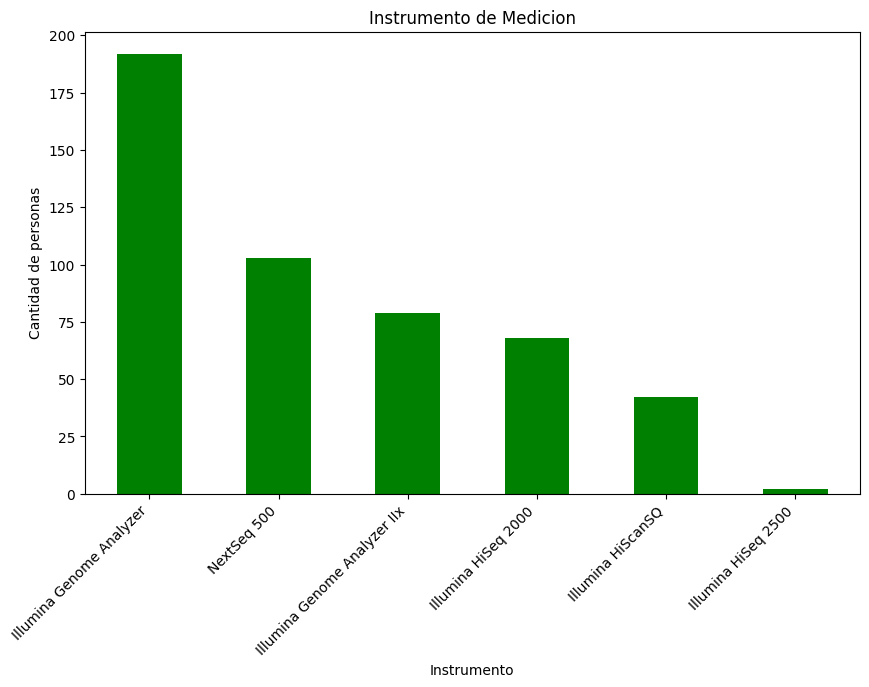

In [ ]:
import matplotlib.pyplot as plt

# Calcular el recuento de personas para cada tipo de fluido
fluid_counts = df_procesado['Instrument'].value_counts()

# Visualización con un gráfico de barras
plt.figure(figsize=(10, 6))
fluid_counts.plot(kind='bar', color='green')
plt.title('Instrumento de Medicion')
plt.xlabel('Instrumento')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.show()


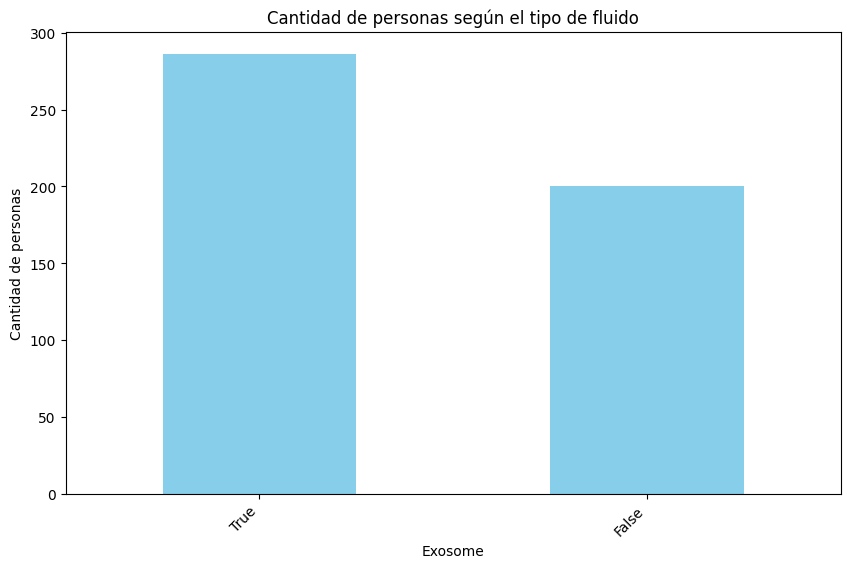

In [ ]:
import matplotlib.pyplot as plt

# Calcular el recuento de personas para cada tipo de fluido
fluid_counts = df_procesado['Exosome'].value_counts()

# Visualización con un gráfico de barras
plt.figure(figsize=(10, 6))
fluid_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de personas según el tipo de fluido')
plt.xlabel('Exosome')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.show()


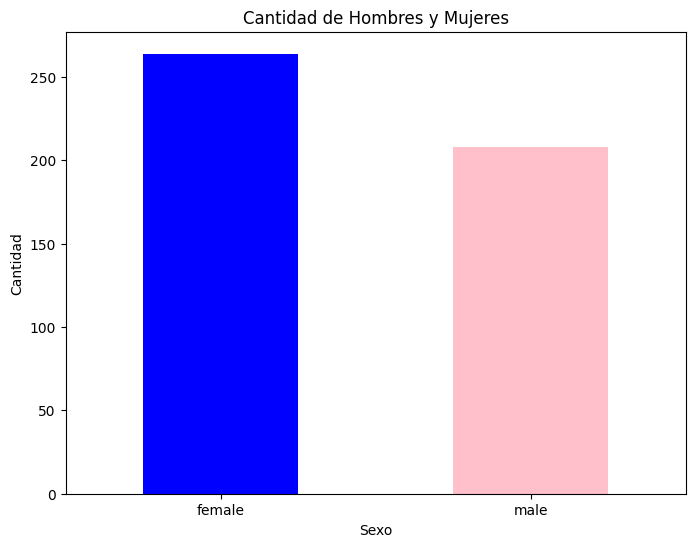

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de hombres y mujeres
conteo_sexo = df_procesado['Sex'].value_counts()

# Graficar
plt.figure(figsize=(8, 6))
conteo_sexo.plot(kind='bar', color=['blue', 'pink'])
plt.title('Cantidad de Hombres y Mujeres')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()


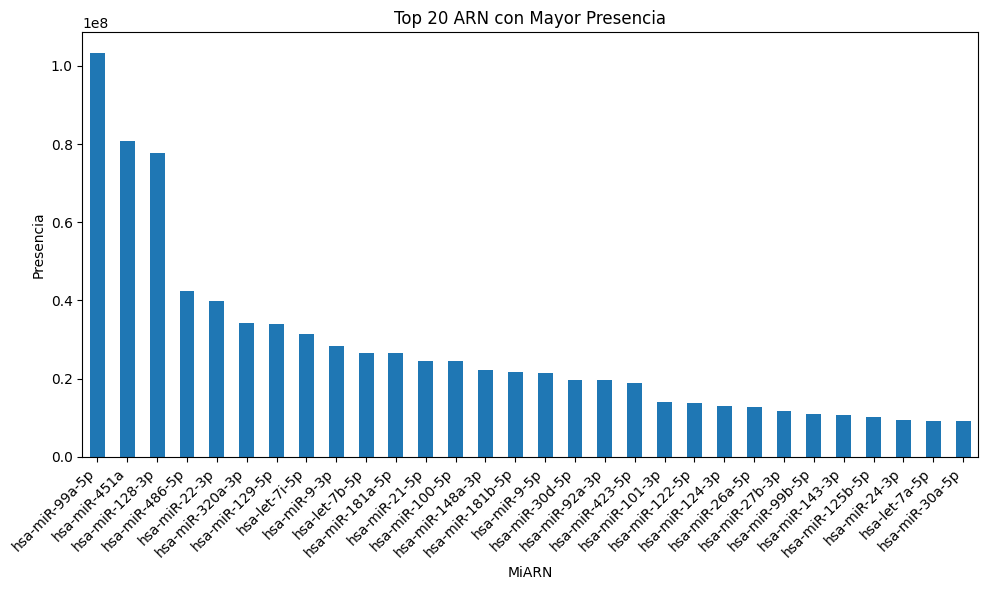

In [ ]:
import matplotlib.pyplot as plt

# Obtener el nombre de todas las columnas de miRNA
columnas_RNA = df_procesado.columns[9:]

# Sumar la presencia de cada RNA en todas las muestras
presencia_RNA = df_procesado[columnas_RNA].sum()

# Seleccionar las 30 miRNA con mayor presencia
top_30_RNA = presencia_RNA.nlargest(30)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_30_RNA.plot(kind='bar')
plt.title('Top 20 ARN con Mayor Presencia')
plt.xlabel('MiARN')
plt.ylabel('Presencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()


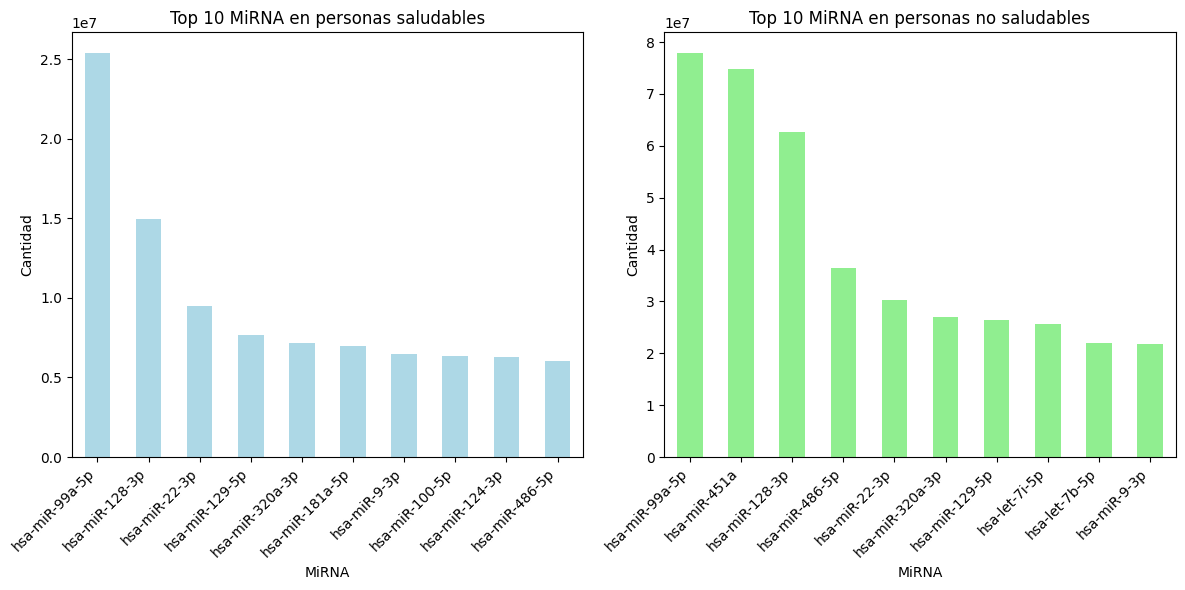

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame por las filas donde 'Healthy' es True
df_healthy = df_procesado[df_procesado['Healthy'] == True]

# Sumar la cantidad de cada MiRNA en el DataFrame filtrado
mirna_counts_healthy = df_healthy.iloc[:, 9:].sum().sort_values(ascending=False)

# Tomar las 10 MiRNA con mayor cantidad
top_mirna_healthy = mirna_counts_healthy.head(10)

# Filtrar el DataFrame por las filas donde 'Healthy' es False
df_unhealthy = df_procesado[df_procesado['Healthy'] == False]

# Sumar la cantidad de cada MiRNA en el DataFrame filtrado
mirna_counts_unhealthy = df_unhealthy.iloc[:, 9:].sum().sort_values(ascending=False)

# Tomar las 10 MiRNA con mayor cantidad
top_mirna_unhealthy = mirna_counts_unhealthy.head(10)

# Graficar
plt.figure(figsize=(12, 6))

# Gráfico para Healthy == True
plt.subplot(1, 2, 1)
top_mirna_healthy.plot(kind='bar', color='lightblue')
plt.title('Top 10 MiRNA en personas saludables')
plt.xlabel('MiRNA')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

# Gráfico para Healthy == False
plt.subplot(1, 2, 2)
top_mirna_unhealthy.plot(kind='bar', color='lightgreen')
plt.title('Top 10 MiRNA en personas no saludables')
plt.xlabel('MiRNA')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


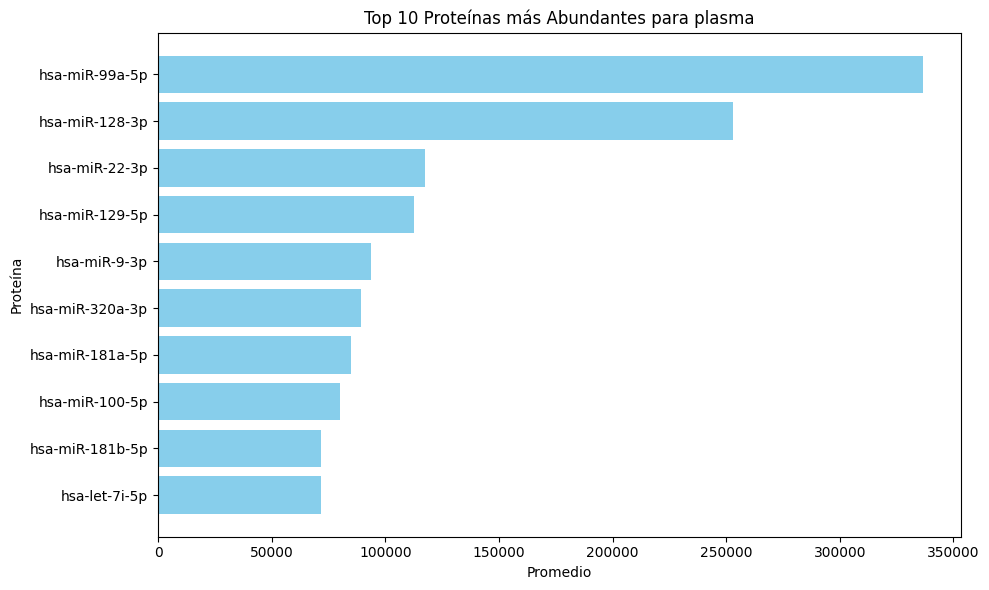

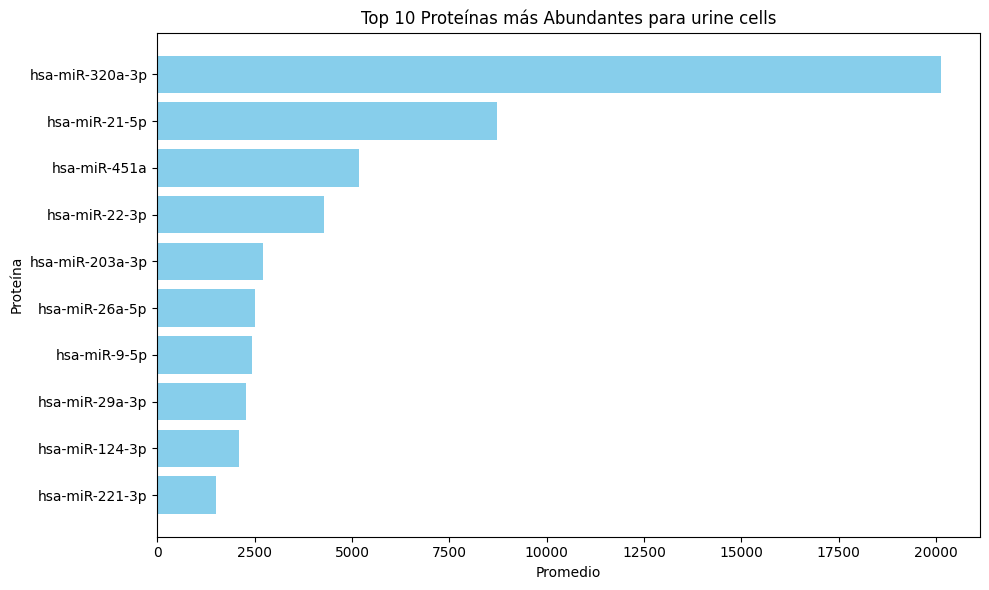

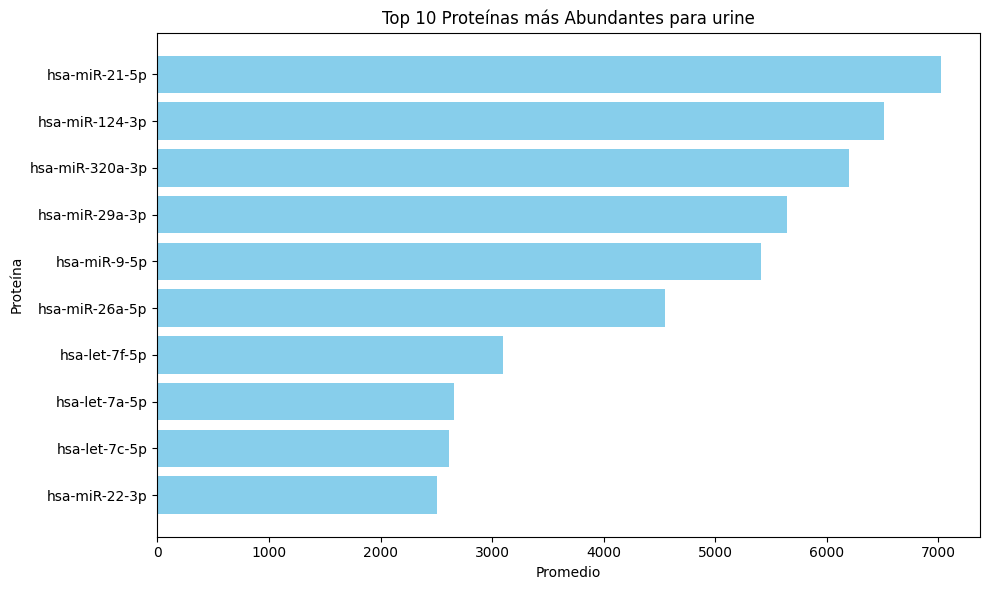

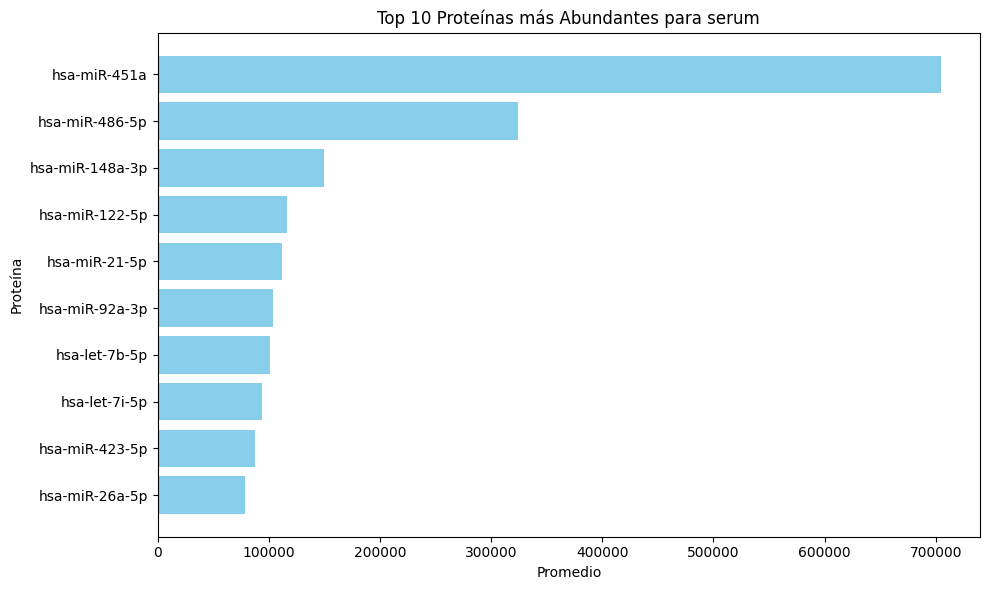

In [ ]:
import matplotlib.pyplot as plt

# Obtener las clases únicas en la columna 'Fluid'
fluid_classes = df_procesado['Fluid'].unique()

# Iterar sobre cada clase de fluido
for fluid_class in fluid_classes:
    # Filtrar el DataFrame por la clase de fluido actual
    df_fluid_class = df_procesado[df_procesado['Fluid'] == fluid_class]
    # Calcular el promedio de abundancia de cada proteína y seleccionar las 10 más abundantes
    top_proteins = df_fluid_class.iloc[:, 9:].mean().nlargest(10)

    # Graficar las proteínas más abundantes para la clase de fluido actual
    plt.figure(figsize=(10, 6))
    plt.barh(top_proteins.index, top_proteins.values, color='skyblue')
    plt.title(f'Top 10 Proteínas más Abundantes para {fluid_class}')
    plt.xlabel('Promedio')
    plt.ylabel('Proteína')
    plt.gca().invert_yaxis()  # Invertir el eje y para que las proteínas más abundantes estén arriba
    plt.tight_layout()
    plt.show()


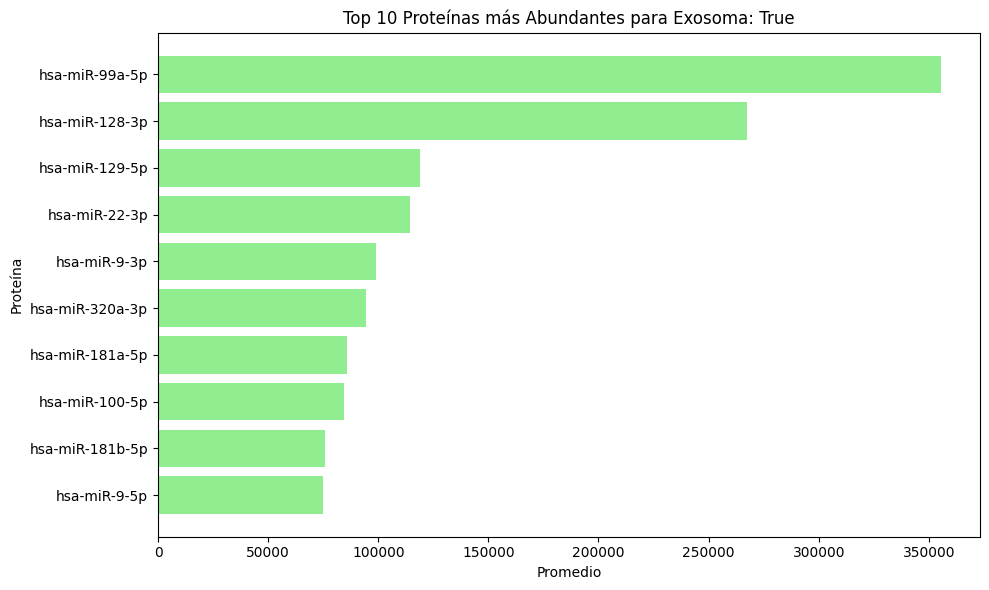

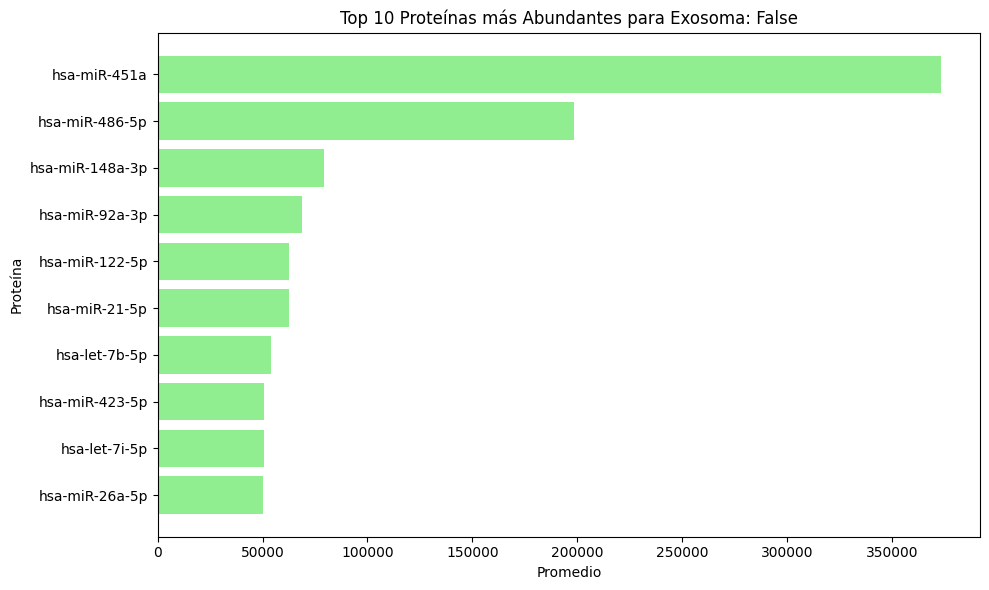

In [ ]:
import matplotlib.pyplot as plt

# Obtener las clases únicas en la columna 'Exosome'
exosome_classes = df_procesado['Exosome'].unique()

# Iterar sobre cada clase de exosoma
for exosome_class in exosome_classes:
    # Filtrar el DataFrame por la clase de exosoma actual
    df_exosome_class = df_procesado[df_procesado['Exosome'] == exosome_class]
    # Calcular el promedio de abundancia de cada proteína y seleccionar las 10 más abundantes
    top_proteins = df_exosome_class.iloc[:, 9:].mean().nlargest(10)

    # Graficar las proteínas más abundantes para la clase de exosoma actual
    plt.figure(figsize=(10, 6))
    plt.barh(top_proteins.index, top_proteins.values, color='lightgreen')
    plt.title(f'Top 10 Proteínas más Abundantes para Exosoma: {exosome_class}')
    plt.xlabel('Promedio')
    plt.ylabel('Proteína')
    plt.gca().invert_yaxis()  # Invertir el eje y para que las proteínas más abundantes estén arriba
    plt.tight_layout()
    plt.show()


#Normalizacion

In [ ]:
# Obtener las columnas que no son numéricas
columnas_no_numericas = df_procesado.select_dtypes(exclude=['number']).columns
print(columnas_no_numericas)



Index(['Instrument', 'Sex', 'Fluid', 'Healthy', 'Cancer', 'Exosome', 'Desc'], dtype='object')


**Identificamos las columnas no numericas y sus valores para poder determinar su categorización**

In [ ]:
# Itera sobre las columnas no numéricas para ver sus categorías únicas
for columna in ['Instrument', 'Sex', 'Fluid', 'Healthy', 'Exosome', 'Desc','Cancer']:
    print(columna, df_procesado[columna].unique())


Instrument ['Illumina HiSeq 2000' 'Illumina HiScanSQ' 'Illumina Genome Analyzer'
 'Illumina Genome Analyzer IIx' 'Illumina HiSeq 2500' 'NextSeq 500']
Sex [nan 'female' 'male']
Fluid ['plasma' 'urine cells' 'urine' 'serum']
Healthy [True False]
Exosome [ True False]
Desc ['Healthy Control' 'Colorectal Cancer' 'Prostate Cancer'
 'Pancreatic Cancer' 'Metastatic renal cell carcinoma (mRCC)'
 'breast cancer tumor serum' 'serum from healthy woman control'
 'chronic fatigue syndrome' 'Serous' 'Granulosa Cell'
 'Myxoid Leiomyosarcoma' 'Mucinous' 'Mixed Mullerian adenofibroma'
 'Epithelioid Leiomyosarcoma' 'Endometrioid' 'Endometrial Adenocarcinoma'
 'Fibroma' 'Leiomyoma' 'Simple cyst' 'Fibrothecoma'
 'Brenner tumor with mucinous cystadenofibroma' 'Atypical leiomyoma'
 'Brenner tumor' 'Clear cell' 'Endometrioma' 'Endo-Clear Cell']
Cancer [False True]


Reemplazo Female-0
          Male-1



In [ ]:
# Eliminar filas con valores NaN en la columna 'Sex'
df_procesado = df_procesado.dropna(subset=['Sex'])

# Reemplazar 'female' por 0 y 'male' por 1 en la columna 'Sex'
df_procesado['Sex'] = df_procesado['Sex'].map({'female': 0, 'male': 1})

# Mostrar las primeras filas para verificar los cambios
print(df_procesado.head())


           Instrument  Sex   Fluid Healthy Cancer  Exosome             Desc  \
14  Illumina HiScanSQ    0  plasma   False  False    False  Healthy Control   
15  Illumina HiScanSQ    0  plasma   False  False    False  Healthy Control   
16  Illumina HiScanSQ    0  plasma   False  False    False  Healthy Control   
17  Illumina HiScanSQ    0  plasma   False  False    False  Healthy Control   
18  Illumina HiScanSQ    0  plasma   False  False    False  Healthy Control   

    index  hsa-miR-6850-3p  hsa-miR-4761-3p  ...  hsa-miR-2467-3p  \
14     14                0                0  ...                0   
15     15                0                0  ...                0   
16     16                0                0  ...                0   
17     17                0                0  ...                0   
18     18                0                0  ...                0   

    hsa-miR-6512-5p  hsa-miR-6718-5p  hsa-miR-520h  hsa-miR-6796-5p  \
14                0                0   

<ipython-input-9-500c0dc72e27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_procesado['Sex'] = df_procesado['Sex'].map({'female': 0, 'male': 1})


** *texto en cursiva*Random Forest**

**Consideraciones**


Con solo 500 registros y una alta dimensionalidad (más de 2000 columnas), es posible que el uso de PCA pueda resultar desafiante debido a la cantidad limitada de datos en comparación con la cantidad de características.

Dado que tienes una cantidad desigual de datos entre los diferentes tipos de fluido, esto también podría afectar la capacidad del modelo para generalizar adecuadamente si entrenas modelos por separado para cada tipo de fluido.

En esta situación,  se piensa que lo más apropiado utilizar un enfoque de categorización de fluidos más amplio y dejar que el algoritmo de Random Forest se encargue de la discriminación. Puedes agrupar los fluidos en categorías más generales (por ejemplo, 'plasma', 'urine', 'serum')

In [ ]:
# Copiar el DataFrame original para mantener los datos intactos
df_forest = df_procesado.copy()

# Categorizar la columna 'Fluid'
fluid_mapping = {'plasma': 0, 'urine cells': 1, 'urine': 2, 'serum': 3}
df_forest['Fluid'] = df_forest['Fluid'].map(fluid_mapping)

# Eliminar las columnas 'Healthy', 'Desc', 'Instrument' y 'index'
columnas_a_eliminar_forest = ['Healthy', 'Desc', 'Instrument', 'index']
df_forest = df_forest.drop(columns=columnas_a_eliminar_forest)
# Convertir 'False' a 0 y 'True' a 1 en la variable 'Exosome'
df_forest['Exosome'] = df_forest['Exosome'].astype(int)
# Convertir los valores booleanos en 0 y 1 en la variable objetivo 'Cancer'
df_forest['Cancer'] = df_forest['Cancer'].astype(int)


# Mostrar el DataFrame listo para el modelo Random Forest
print(df_forest.head())


    Sex  Fluid  Cancer  Exosome  hsa-miR-6850-3p  hsa-miR-4761-3p  \
14    0      0       0        0                0                0   
15    0      0       0        0                0                0   
16    0      0       0        0                0                0   
17    0      0       0        0                0                0   
18    0      0       0        0                0                0   

    hsa-miR-99b-3p  hsa-miR-3129-5p  hsa-miR-6820-5p  hsa-miR-4731-5p  ...  \
14               7                0                0                3  ...   
15               0                0                0                0  ...   
16               2                0                0                0  ...   
17               0                0                0                0  ...   
18              58                0                0                0  ...   

    hsa-miR-2467-3p  hsa-miR-6512-5p  hsa-miR-6718-5p  hsa-miR-520h  \
14                0                0         

##Normalizacion

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separar las tablas por tipo de fluido
dataframes_por_fluido = {}
for fluido, grupo in df_forest.groupby('Fluid'):
    dataframes_por_fluido[fluido] = grupo.copy()

# Función para normalizar las características numéricas
def normalizar_dataframe(df):
    # Separar características y variable objetivo
    y = df['Cancer']
    fluid = df['Fluid']
    X = df.drop(columns=['Cancer', 'Fluid'])

    # Normalizar características numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Crear un DataFrame normalizado con las columnas originales
    df_normalizado = pd.DataFrame(X_scaled, columns=X.columns)

    # Agregar la variable objetivo y el tipo de fluido
    df_normalizado['Cancer'] = y.reset_index(drop=True)
    df_normalizado['Fluid'] = fluid.reset_index(drop=True)

    return df_normalizado

# Normalizar cada DataFrame por tipo de fluido
dataframes_normalizados = {fluido: normalizar_dataframe(df) for fluido, df in dataframes_por_fluido.items()}

# Unir todos los DataFrames normalizados en uno solo
df_normalizado_completo = pd.concat(dataframes_normalizados.values(), ignore_index=True)

# Mostrar los primeros registros del DataFrame normalizado
print(df_normalizado_completo.head())



        Sex   Exosome  hsa-miR-6850-3p  hsa-miR-4761-3p  hsa-miR-99b-3p  \
0 -1.183216 -2.058243        -0.081989        -0.083624       -1.696763   
1 -1.183216 -2.058243        -0.081989        -0.083624       -1.708722   
2 -1.183216 -2.058243        -0.081989        -0.083624       -1.705306   
3 -1.183216 -2.058243        -0.081989        -0.083624       -1.708722   
4 -1.183216 -2.058243        -0.081989        -0.083624       -1.609634   

   hsa-miR-3129-5p  hsa-miR-6820-5p  hsa-miR-4731-5p  hsa-miR-136-5p  \
0              0.0        -0.081111        16.941074       -1.423814   
1              0.0        -0.081111        -0.059028       -1.423814   
2              0.0        -0.081111        -0.059028       -1.423814   
3              0.0        -0.081111        -0.059028       -1.423814   
4              0.0        -0.081111        -0.059028       -1.286161   

   hsa-miR-106b-5p  ...  hsa-miR-6718-5p  hsa-miR-520h  hsa-miR-6796-5p  \
0        -0.426392  ...        -0.076821 

**Copia de los datos para modelo con red neuronal**





In [ ]:
# Copias para Random Forest y Red Neuronal
df_random_forest = df_normalizado_completo.copy()
df_red_neuronal = df_normalizado_completo.copy()

#PCA

###Eliminacion de Outliers mediante distancia de Mahalanobis Tabla Completa Aplicar PCA a la tabla completa MANTENIENDO 95% VARIANZA

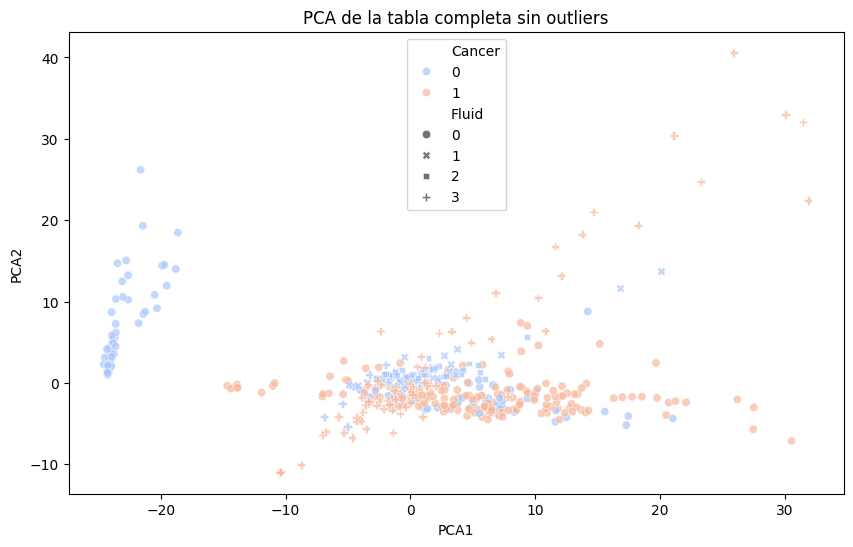

In [ ]:
import numpy as np
from scipy.spatial import distance

# Función para calcular la distancia de Mahalanobis
def distancia_mahalanobis(X):
    cov_matrix = np.cov(X, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_distr = np.mean(X, axis=0)
    mahalanobis_dist = []
    for i in range(len(X)):
        mahalanobis_dist.append(distance.mahalanobis(X[i], mean_distr, inv_cov_matrix))
    return np.array(mahalanobis_dist)

# Calcular distancias de Mahalanobis para los datos PCA de la tabla completa
X_pca_completo = df_pca_completo[['PCA1', 'PCA2']].values
dist_mahalanobis = distancia_mahalanobis(X_pca_completo)

# Establecer un umbral para definir outliers (puede ajustarse según el caso)
umbral = np.percentile(dist_mahalanobis, 97.5)

# Identificar y eliminar outliers
outliers = dist_mahalanobis > umbral
df_normalizado_completo_sin_outliers = df_normalizado_completo[~outliers]

# Volver a aplicar PCA después de eliminar outliers
pca_completo = PCA(n_components=2)
X_pca_completo_sin_outliers = pca_completo.fit_transform(df_normalizado_completo_sin_outliers.drop(columns=['Cancer', 'Fluid']))

# Crear un DataFrame con los componentes principales y las columnas 'Cancer' y 'Fluid'
df_pca_completo_sin_outliers = pd.DataFrame(X_pca_completo_sin_outliers, columns=['PCA1', 'PCA2'])
df_pca_completo_sin_outliers['Cancer'] = df_normalizado_completo_sin_outliers['Cancer'].reset_index(drop=True)
df_pca_completo_sin_outliers['Fluid'] = df_normalizado_completo_sin_outliers['Fluid'].reset_index(drop=True)

# Graficar los primeros dos componentes principales sin outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_completo_sin_outliers, x='PCA1', y='PCA2', hue='Cancer', style='Fluid', palette='coolwarm', alpha=0.7)
plt.title('PCA de la tabla completa sin outliers')
plt.show()


###PCA 3D


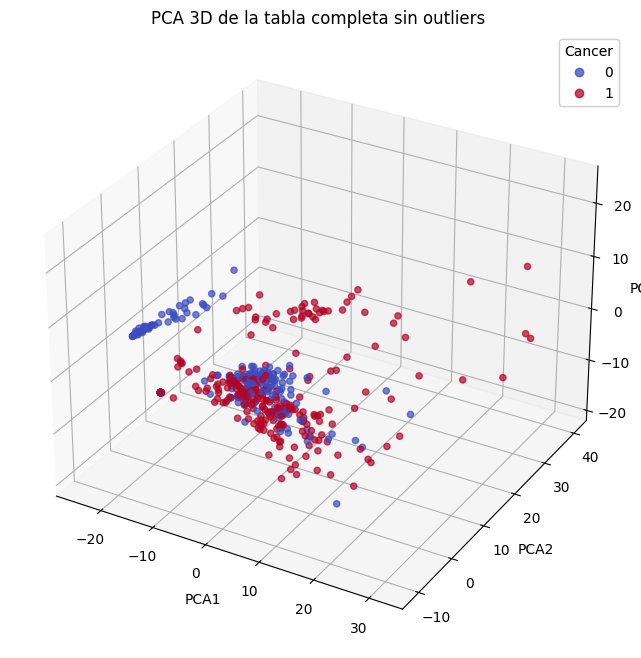

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Aplicar PCA con 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(df_normalizado_completo_sin_outliers.drop(columns=['Cancer', 'Fluid']))

# Crear un DataFrame con los componentes principales y las columnas 'Cancer' y 'Fluid'
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_3d['Cancer'] = df_normalizado_completo_sin_outliers['Cancer'].reset_index(drop=True)
df_pca_3d['Fluid'] = df_normalizado_completo_sin_outliers['Fluid'].reset_index(drop=True)

# Graficar PCA 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PCA1'], df_pca_3d['PCA2'], df_pca_3d['PCA3'], c=df_pca_3d['Cancer'], cmap='coolwarm', alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Cancer")
ax.add_artist(legend1)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('PCA 3D de la tabla completa sin outliers')
plt.show()


###UMAP


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00


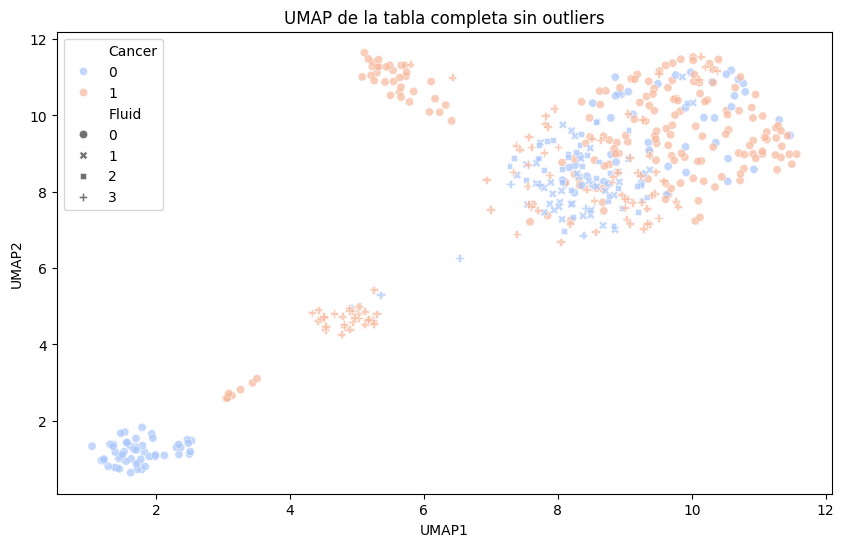

In [ ]:
import umap

# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.3, metric='euclidean')
X_umap = umap_model.fit_transform(df_normalizado_completo_sin_outliers.drop(columns=['Cancer', 'Fluid']))

# Crear un DataFrame con los componentes UMAP y las columnas 'Cancer' y 'Fluid'
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['Cancer'] = df_normalizado_completo_sin_outliers['Cancer'].reset_index(drop=True)
df_umap['Fluid'] = df_normalizado_completo_sin_outliers['Fluid'].reset_index(drop=True)

# Graficar UMAP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Cancer', style='Fluid', palette='coolwarm', alpha=0.7)
plt.title('UMAP de la tabla completa sin outliers')
plt.show()


###Clustering con K-Means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


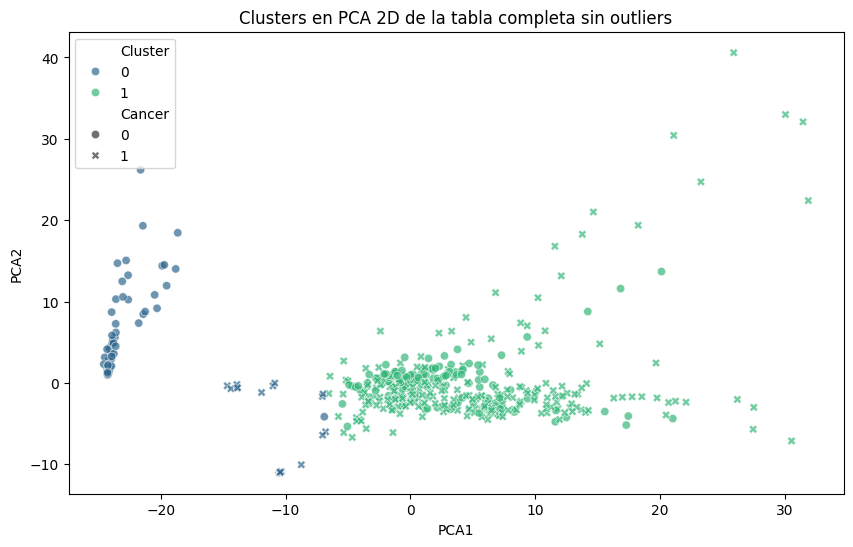

In [ ]:
from sklearn.cluster import KMeans

# Aplicar K-Means
kmeans_model = KMeans(n_clusters=2, random_state=42)
df_pca_completo_sin_outliers['Cluster'] = kmeans_model.fit_predict(df_pca_completo_sin_outliers.drop(columns=['Cancer', 'Fluid']))

# Graficar los clusters en PCA 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_completo_sin_outliers, x='PCA1', y='PCA2', hue='Cluster', style='Cancer', palette='viridis', alpha=0.7)
plt.title('Clusters en PCA 2D de la tabla completa sin outliers')
plt.show()


##Aplicar PCA a las tablas divididas por tipo de fluido

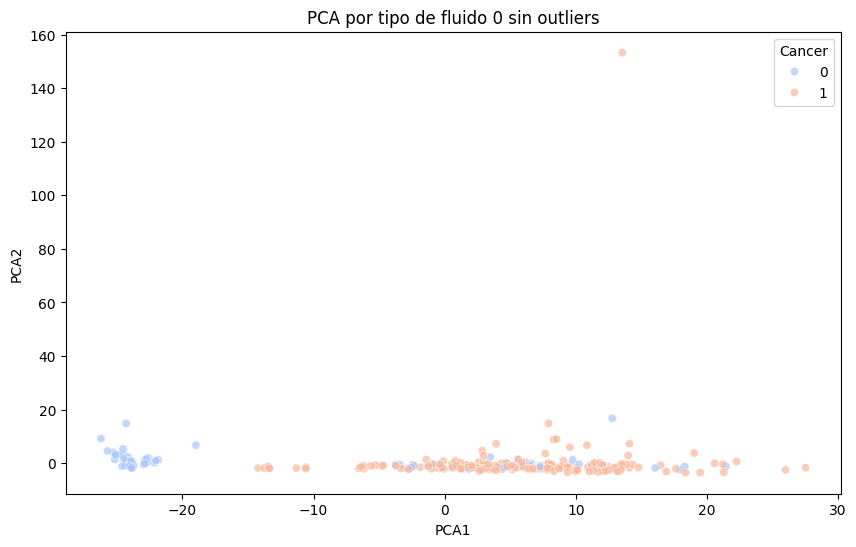

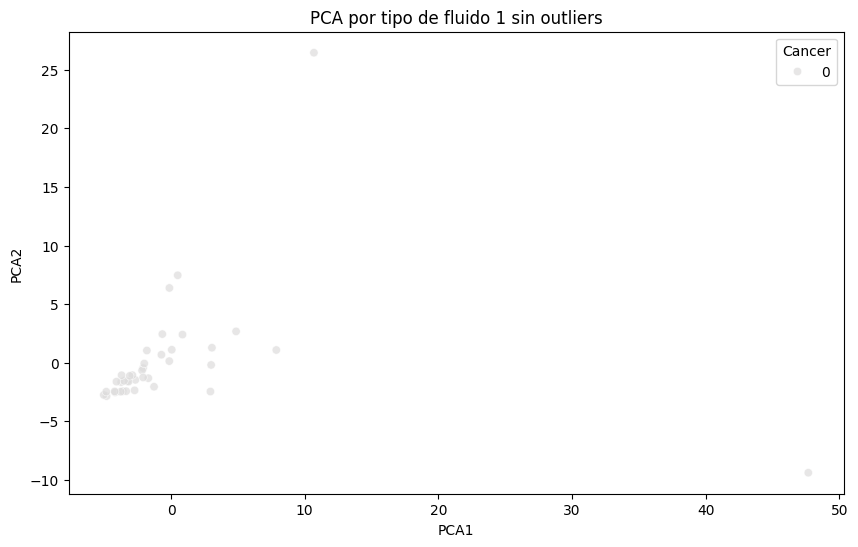

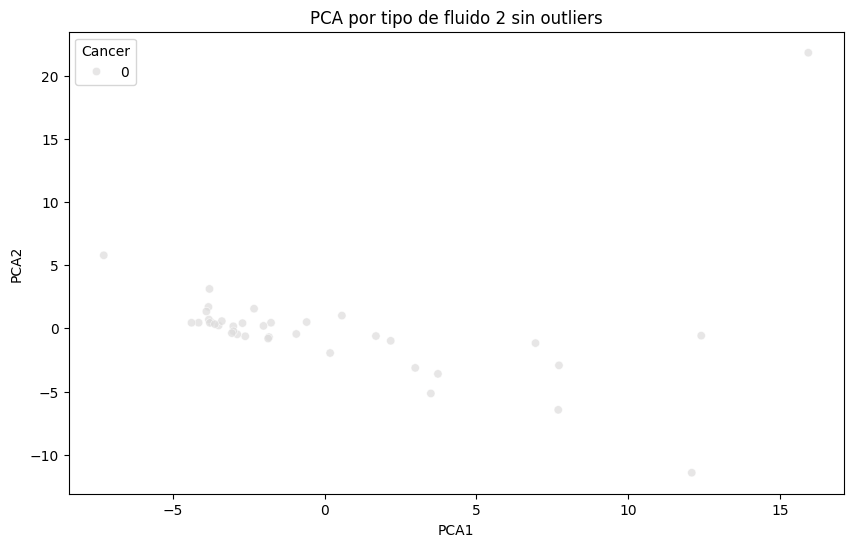

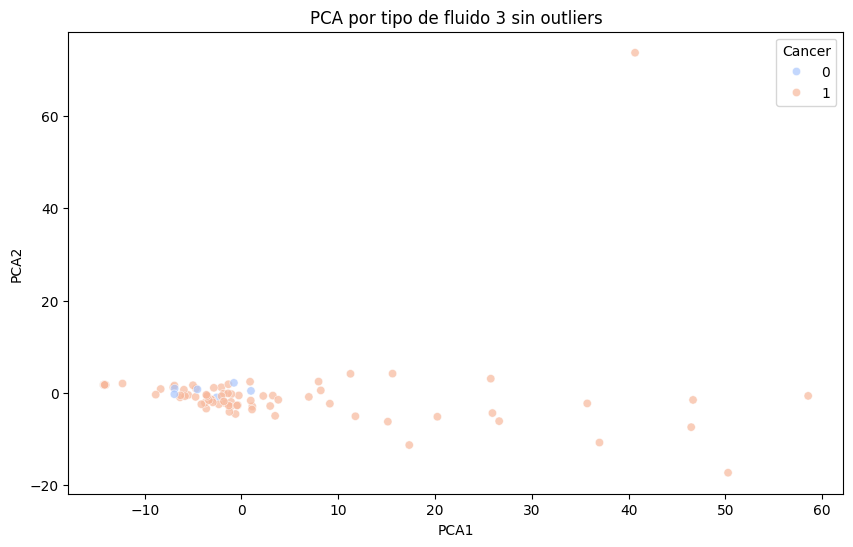

In [ ]:
# Función para aplicar PCA y eliminar outliers de un DataFrame
def aplicar_pca_y_eliminar_outliers(df, titulo=''):
    # Separar características y variable objetivo
    X = df.drop(columns=['Cancer', 'Fluid'])
    y = df['Cancer']
    fluid = df['Fluid']

    # Aplicar PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Calcular distancias de Mahalanobis y eliminar outliers
    dist_mahalanobis = distancia_mahalanobis(X_pca)
    umbral = np.percentile(dist_mahalanobis, 97.5)
    outliers = dist_mahalanobis > umbral
    df_sin_outliers = df[~outliers]

    # Volver a aplicar PCA después de eliminar outliers
    X_sin_outliers = df_sin_outliers.drop(columns=['Cancer', 'Fluid'])
    X_pca_sin_outliers = pca.fit_transform(X_sin_outliers)

    # Crear un DataFrame con los componentes principales y las columnas 'Cancer' y 'Fluid'
    df_pca = pd.DataFrame(X_pca_sin_outliers, columns=['PCA1', 'PCA2'])
    df_pca['Cancer'] = df_sin_outliers['Cancer'].reset_index(drop=True)
    df_pca['Fluid'] = df_sin_outliers['Fluid'].reset_index(drop=True)

    # Graficar los primeros dos componentes principales
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cancer', palette='coolwarm', alpha=0.7)
    plt.title(f'PCA {titulo} sin outliers')
    plt.show()

    return df_sin_outliers

# Aplicar PCA a cada DataFrame normalizado por tipo de fluido, eliminar outliers y graficar
dataframes_sin_outliers_por_fluido = {}
for fluido, df in dataframes_normalizados.items():
    titulo = f'por tipo de fluido {fluido}'
    df_sin_outliers = aplicar_pca_y_eliminar_outliers(df, titulo=titulo)
    dataframes_sin_outliers_por_fluido[fluido] = df_sin_outliers

# Unir todos los DataFrames transformados por PCA en uno solo
df_normalizado_completo_sin_outliers_por_fluido = pd.concat(dataframes_sin_outliers_por_fluido.values(), ignore_index=True)


###PCA 3D

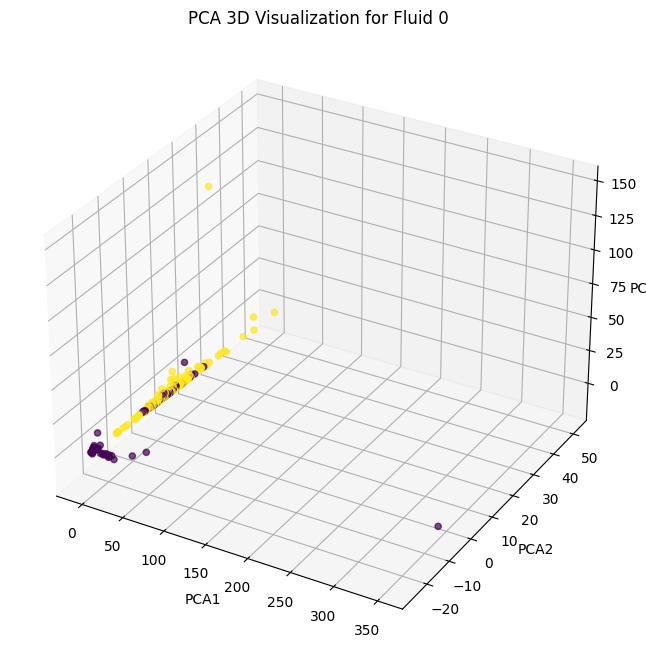

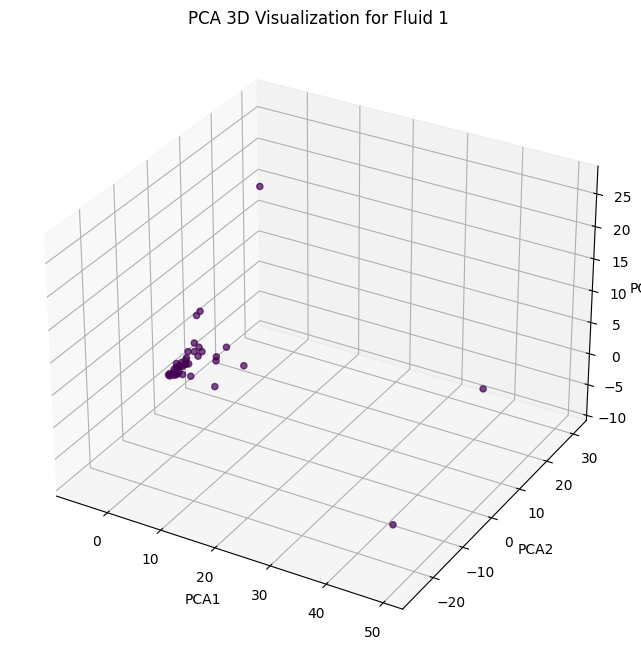

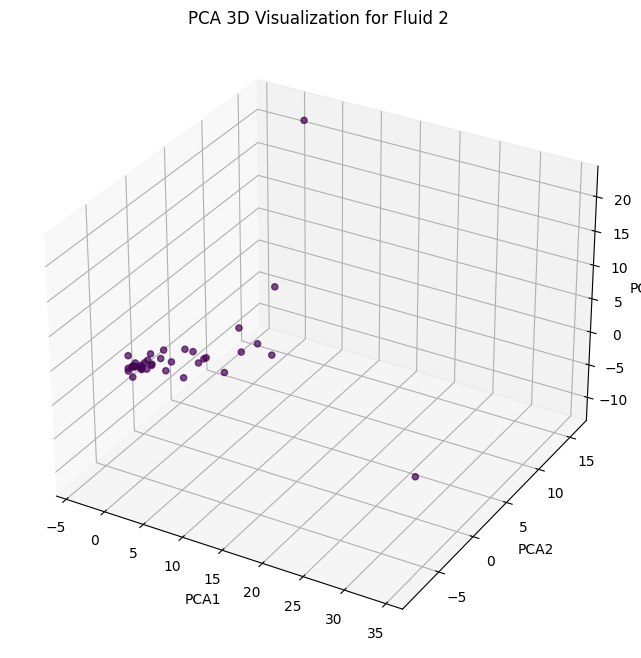

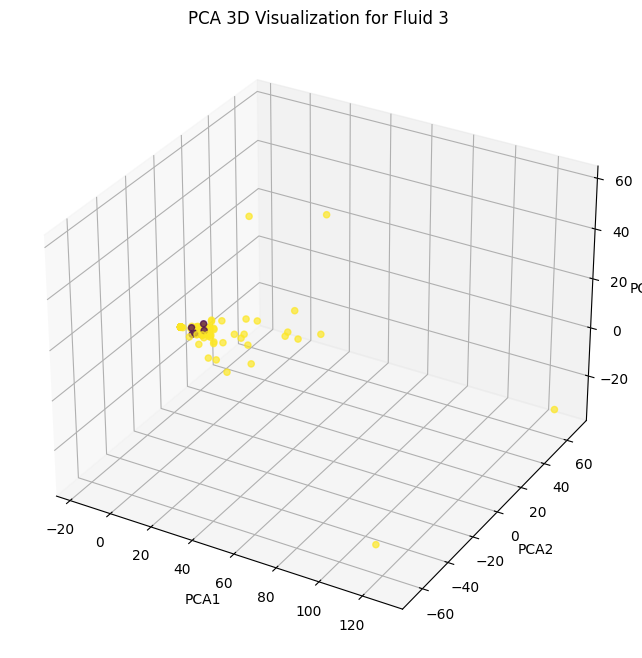

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Función para aplicar PCA en 3D
def aplicar_pca_3d(df):
    # Separar características y variable objetivo
    y = df['Cancer']
    X = df.drop(columns=['Cancer', 'Fluid'])

    # Normalizar características numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplicar PCA a las características normalizadas
    pca_model = PCA(n_components=3)
    X_pca = pca_model.fit_transform(X_scaled)

    # Crear DataFrame con las componentes principales y la variable objetivo
    df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
    df_pca['Cancer'] = y.reset_index(drop=True)

    return df_pca

# Crear un diccionario para almacenar los resultados de PCA en 3D por tipo de fluido
pca_3d_results_por_fluido = {}

# Aplicar PCA en 3D para cada tabla por tipo de fluido
for fluido, df_fluido in dataframes_normalizados.items():
    pca_3d_results_por_fluido[fluido] = aplicar_pca_3d(df_fluido)

# Graficar los resultados de PCA en 3D para cada tipo de fluido
for fluido, df_pca_3d in pca_3d_results_por_fluido.items():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_pca_3d['PCA1'], df_pca_3d['PCA2'], df_pca_3d['PCA3'], c=df_pca_3d['Cancer'], cmap='viridis', alpha=0.7)
    ax.set_title(f'PCA 3D Visualization for Fluid {fluido}')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.show()


###t-SNE

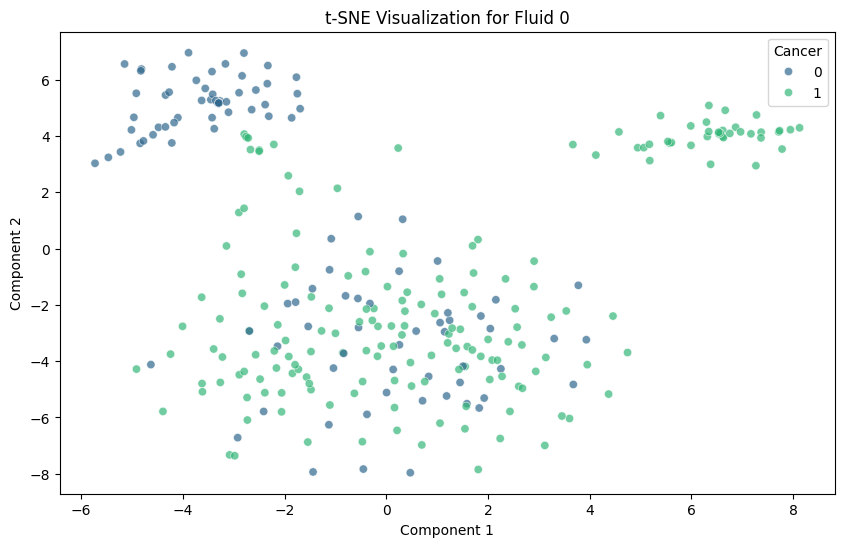

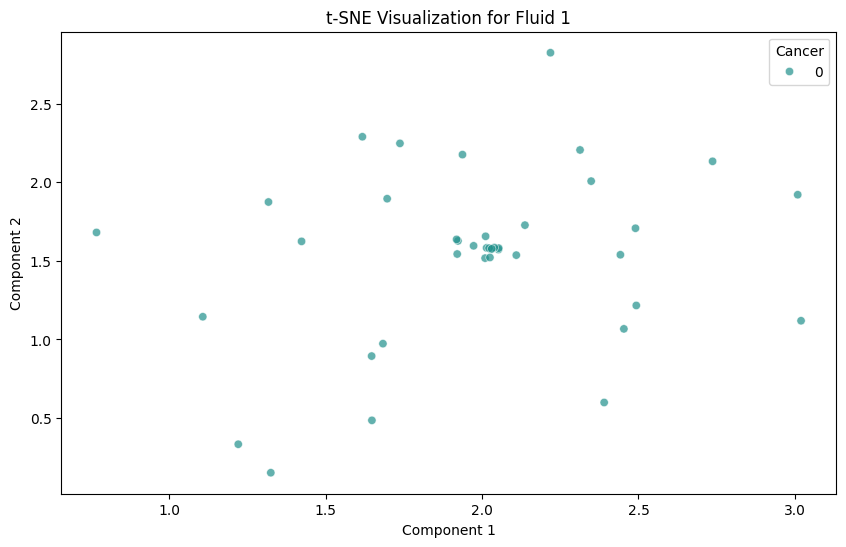

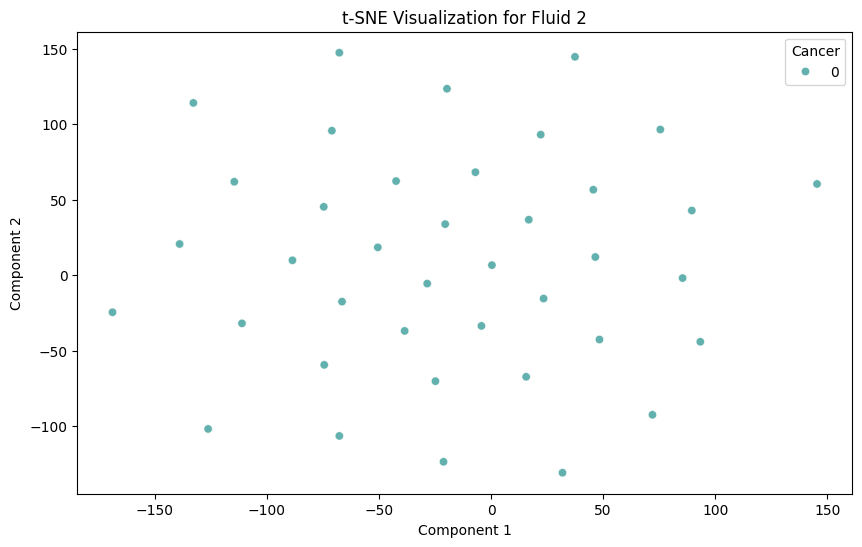

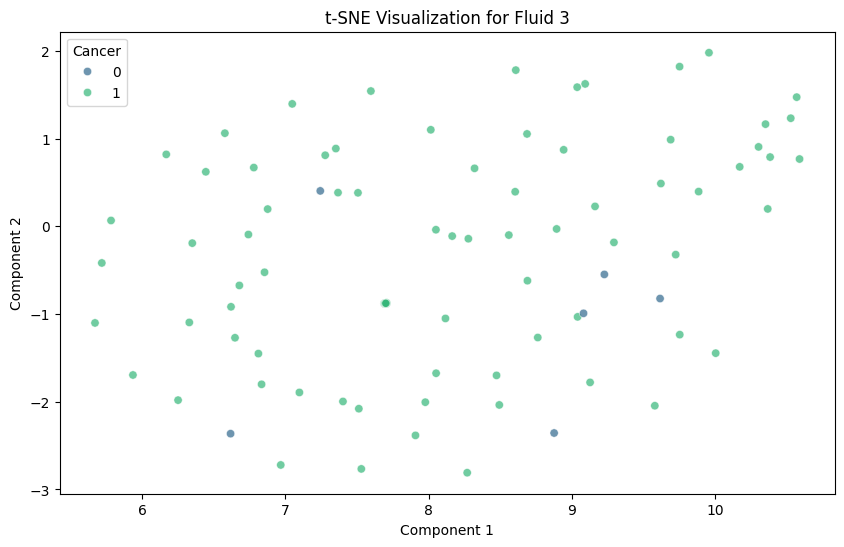

In [ ]:
# Graficar los resultados de t-SNE para cada tipo de fluido
for fluido, tsne_result in tsne_results_por_fluido.items():
    # Crear DataFrame con los resultados de t-SNE
    df_tsne_result = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])
    df_tsne_result['Cancer'] = dataframes_normalizados[fluido]['Cancer']  # Agregar la variable objetivo

    # Graficar
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_tsne_result, x='Component 1', y='Component 2', hue='Cancer', palette='viridis', alpha=0.7)
    plt.title(f't-SNE Visualization for Fluid {fluido}')
    plt.show()



###UMAP

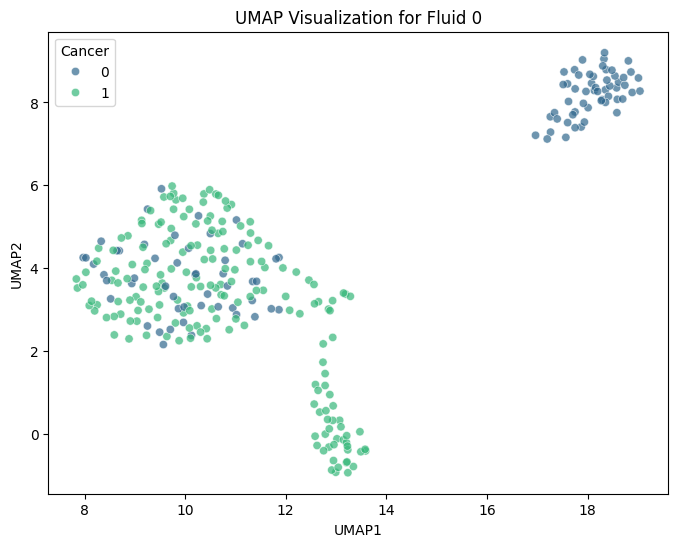

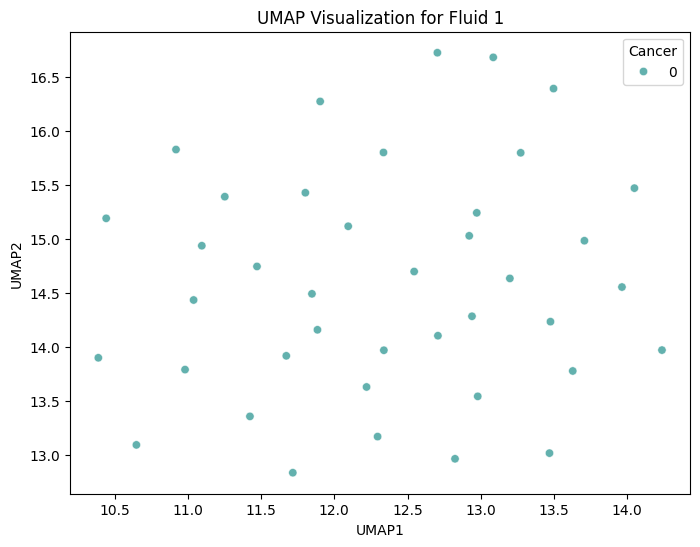

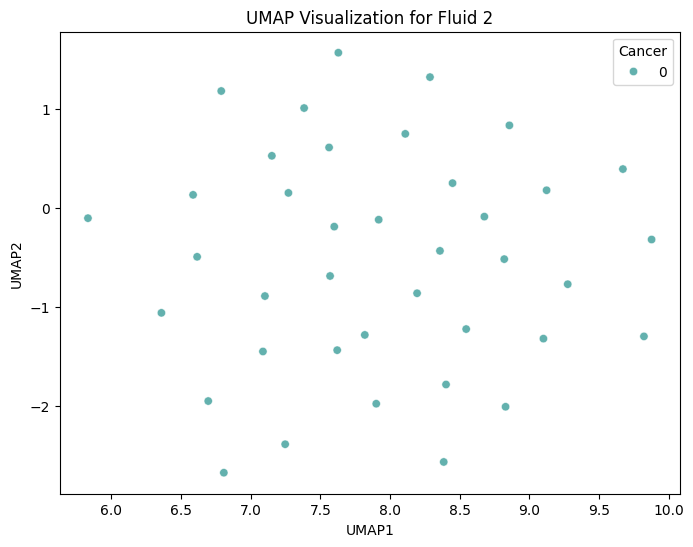

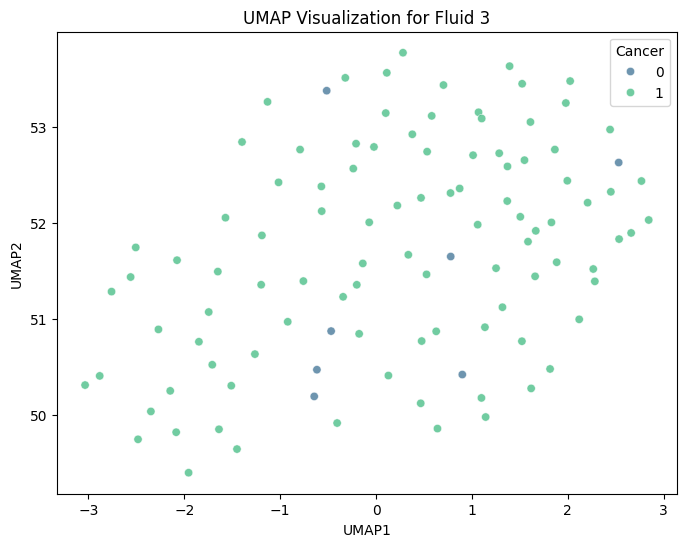

In [ ]:
import umap

# Función para aplicar UMAP
def aplicar_umap(df):
    # Separar características y variable objetivo
    y = df['Cancer']
    X = df.drop(columns=['Cancer', 'Fluid'])

    # Aplicar UMAP a las características
    umap_model = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.3, metric='euclidean')
    X_umap = umap_model.fit_transform(X)

    # Crear DataFrame con las componentes UMAP y la variable objetivo
    df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
    df_umap['Cancer'] = y.reset_index(drop=True)

    return df_umap

# Crear un diccionario para almacenar los resultados de UMAP por tipo de fluido
umap_results_por_fluido = {}

# Aplicar UMAP para cada tabla por tipo de fluido
for fluido, df_fluido in dataframes_normalizados.items():
    umap_results_por_fluido[fluido] = aplicar_umap(df_fluido)

# Graficar los resultados de UMAP para cada tipo de fluido
for fluido, df_umap in umap_results_por_fluido.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_umap, x='UMAP1', y='UMAP2', hue='Cancer', palette='viridis', alpha=0.7)
    plt.title(f'UMAP Visualization for Fluid {fluido}')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.show()


#Entrenamiento Red Neuronal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


##Division de Datos

In [ ]:
# División de datos para el conjunto completo
X_completo = df_normalizado_completo.drop(columns=['Cancer', 'Fluid'])
y_completo = df_normalizado_completo['Cancer']
X_train_completo, X_test_completo, y_train_completo, y_test_completo = train_test_split(X_completo, y_completo, test_size=0.3, random_state=42)

# División de datos para el plasma
X_plasma = dataframes_normalizados[0].drop(columns=['Cancer', 'Fluid'])
y_plasma = dataframes_normalizados[0]['Cancer']
X_train_plasma, X_test_plasma, y_train_plasma, y_test_plasma = train_test_split(X_plasma, y_plasma, test_size=0.3, random_state=42)


##Entrenamiento y evaluación de modelos Tabla Completa:


In [ ]:
# Definir modelos
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier()
}

# Entrenar y evaluar modelos para el conjunto completo
for name, model in models.items():
    model.fit(X_train_completo, y_train_completo)
    y_pred = model.predict(X_test_completo)
    accuracy = accuracy_score(y_test_completo, y_pred)
    precision = precision_score(y_test_completo, y_pred)
    recall = recall_score(y_test_completo, y_pred)
    f1 = f1_score(y_test_completo, y_pred)
    print(f'{name} - Complete Dataset:')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}')

# Entrenar y evaluar modelos para el plasma
for name, model in models.items():
    model.fit(X_train_plasma, y_train_plasma)
    y_pred = model.predict(X_test_plasma)
    accuracy = accuracy_score(y_test_plasma, y_pred)
    precision = precision_score(y_test_plasma, y_pred)
    recall = recall_score(y_test_plasma, y_pred)
    f1 = f1_score(y_test_plasma, y_pred)
    print(f'{name} - Plasma Dataset:')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}')


SVM - Complete Dataset:
Accuracy: 0.7605633802816901, Precision: 0.7155963302752294, Recall: 0.9629629629629629, F1-score: 0.8210526315789474
Random Forest - Complete Dataset:
Accuracy: 0.852112676056338, Precision: 0.7941176470588235, Recall: 1.0, F1-score: 0.8852459016393442
Neural Network - Complete Dataset:
Accuracy: 0.6338028169014085, Precision: 0.6835443037974683, Recall: 0.6666666666666666, F1-score: 0.675
SVM - Plasma Dataset:
Accuracy: 0.8620689655172413, Precision: 0.8636363636363636, Recall: 0.95, F1-score: 0.9047619047619048
Random Forest - Plasma Dataset:
Accuracy: 0.896551724137931, Precision: 0.8695652173913043, Recall: 1.0, F1-score: 0.9302325581395349
Neural Network - Plasma Dataset:
Accuracy: 0.8390804597701149, Precision: 0.8833333333333333, Recall: 0.8833333333333333, F1-score: 0.8833333333333333


##Experimentación con características reducidas por PCA

In [ ]:
from sklearn.model_selection import train_test_split

# Realizar PCA para el conjunto de datos completo
pca_model_completo = PCA(n_components=3)  # Aquí especifica el número deseado de componentes principales
X_pca_completo = pca_model_completo.fit_transform(df_normalizado_completo.drop(columns=['Cancer', 'Fluid']))

# Convertir las características PCA a un DataFrame
df_pca_completo = pd.DataFrame(X_pca_completo, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_completo['Cancer'] = df_normalizado_completo['Cancer']
df_pca_completo['Fluid'] = df_normalizado_completo['Fluid']

# Realizar PCA para el plasma
pca_model_plasma = PCA(n_components=3)  # Aquí especifica el número deseado de componentes principales
X_pca_plasma = pca_model_plasma.fit_transform(dataframes_normalizados[0].drop(columns=['Cancer', 'Fluid']))

# Convertir las características PCA a un DataFrame
df_pca_plasma = pd.DataFrame(X_pca_plasma, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_plasma['Cancer'] = dataframes_normalizados[0]['Cancer']


###División de datos:


In [ ]:
# Obtener características reducidas por PCA
X_pca_completo = df_pca_completo.drop(columns=['Cancer'])
y_pca_completo = df_pca_completo['Cancer']
X_train_pca_completo, X_test_pca_completo, y_train_pca_completo, y_test_pca_completo = train_test_split(X_pca_completo, y_pca_completo, test_size=0.3, random_state=42)


# Calcular PCA para los datos del plasma
pca_plasma = PCA(n_components=2)  # Especifica el número de componentes principales deseados
X_pca_plasma = pca_plasma.fit_transform(X_plasma)  # X_plasma son tus características originales del plasma

# Ahora X_pca_plasma contiene las características reducidas por PCA para el plasma
# Divide los datos de PCA en conjuntos de entrenamiento y prueba
X_train_pca_plasma, X_test_pca_plasma, y_train_pca_plasma, y_test_pca_plasma = train_test_split(X_pca_plasma, y_plasma, test_size=0.3, random_state=42)


###Entrenamiento y evaluación de modelos:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenar y evaluar modelos para el conjunto completo con características reducidas por PCA
for name, model in models.items():
    model.fit(X_train_pca_completo, y_train_pca_completo)
    y_pred = model.predict(X_test_pca_completo)
    accuracy = accuracy_score(y_test_pca_completo, y_pred)
    precision = precision_score(y_test_pca_completo, y_pred)  # Corregido
    recall = recall_score(y_test_pca_completo, y_pred)  # Corregido
    f1 = f1_score(y_test_pca_completo, y_pred)  # Corregido
    print(f'{name} - PCA Reduced Dataset (Complete):')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}')

# Entrenar y evaluar modelos para el plasma con características reducidas por PCA
for name, model in models.items():
    model.fit(X_train_pca_plasma, y_train_pca_plasma)
    y_pred = model.predict(X_test_pca_plasma)
    accuracy = accuracy_score(y_test_pca_plasma, y_pred)
    precision = precision_score(y_test_pca_plasma, y_pred)  # Corregido
    recall = recall_score(y_test_pca_plasma, y_pred)  # Corregido
    f1 = f1_score(y_test_pca_plasma, y_pred)  # Corregido
    print(f'{name} - PCA Reduced Dataset (Plasma):')
    print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}')


SVM - PCA Reduced Dataset (Complete):
Accuracy: 0.6901408450704225, Precision: 0.6637168141592921, Recall: 0.9259259259259259, F1-score: 0.7731958762886598
Random Forest - PCA Reduced Dataset (Complete):
Accuracy: 0.8450704225352113, Precision: 0.8172043010752689, Recall: 0.9382716049382716, F1-score: 0.8735632183908048


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - PCA Reduced Dataset (Complete):
Accuracy: 0.8098591549295775, Precision: 0.78125, Recall: 0.9259259259259259, F1-score: 0.847457627118644
SVM - PCA Reduced Dataset (Plasma):
Accuracy: 0.896551724137931, Precision: 0.8695652173913043, Recall: 1.0, F1-score: 0.9302325581395349
Random Forest - PCA Reduced Dataset (Plasma):
Accuracy: 0.7586206896551724, Precision: 0.8679245283018868, Recall: 0.7666666666666667, F1-score: 0.8141592920353983
Neural Network - PCA Reduced Dataset (Plasma):
Accuracy: 0.8505747126436781, Precision: 0.8615384615384616, Recall: 0.9333333333333333, F1-score: 0.8960000000000001


# Analisis de Resultados

<ipython-input-60-3ef86ae1f38f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_columns, palette='viridis')


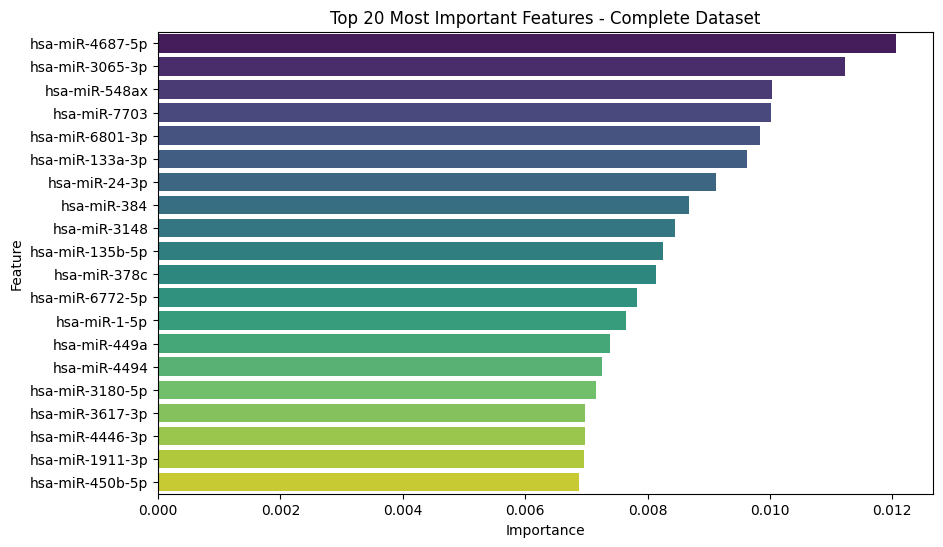

<ipython-input-60-3ef86ae1f38f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_importances, y=bottom_columns, palette='viridis')


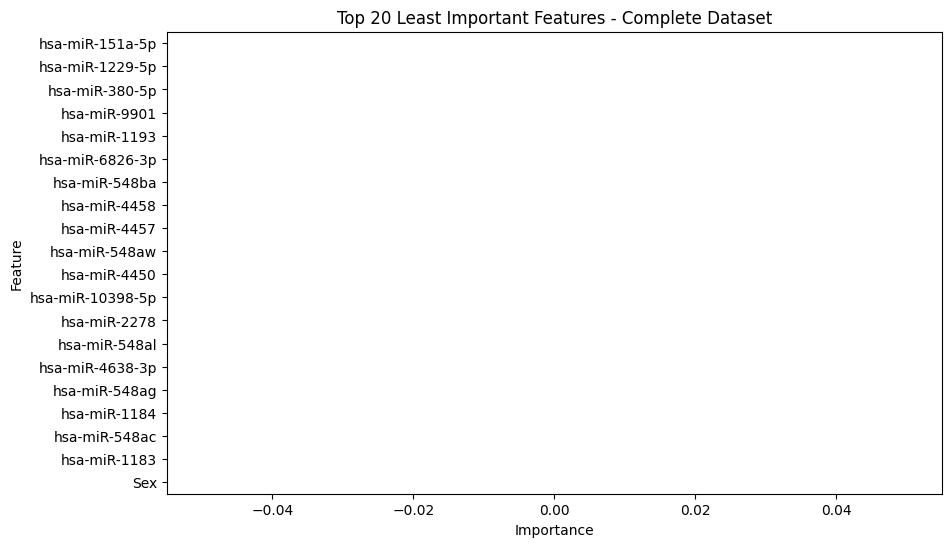

<ipython-input-60-3ef86ae1f38f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_columns, palette='viridis')


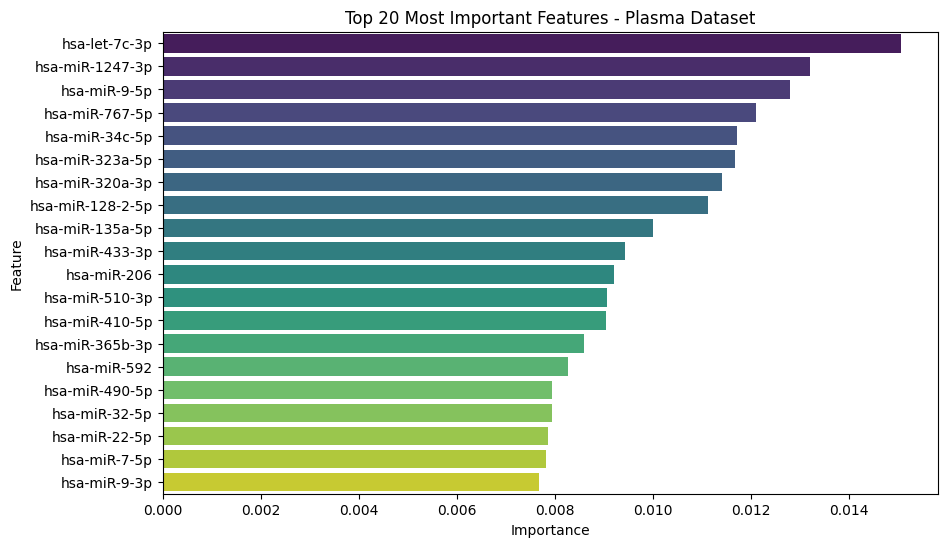

<ipython-input-60-3ef86ae1f38f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_importances, y=bottom_columns, palette='viridis')


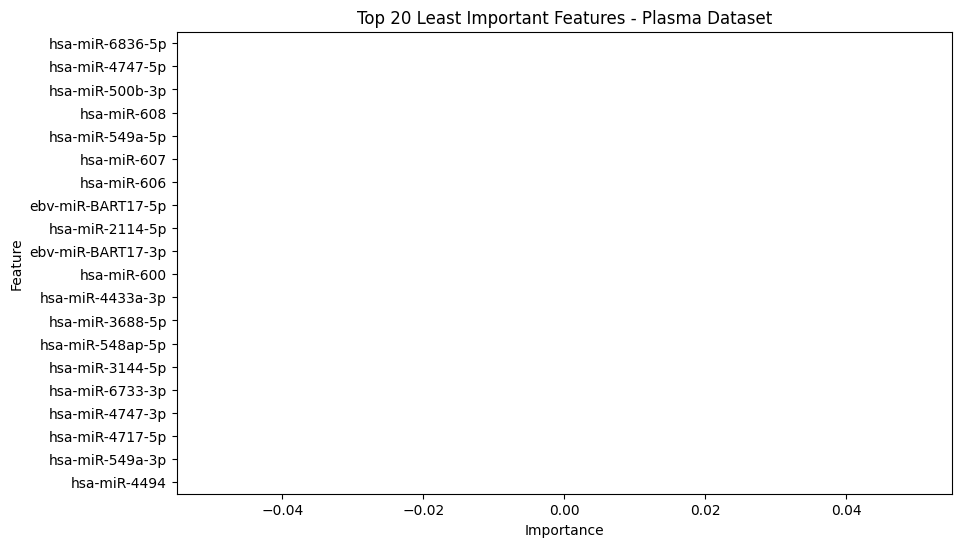

In [ ]:
# Define una función para visualizar las características más importantes
def plot_feature_importance(importances, columns, dataset, top_n=20):
    # Ordenar las importancias y columnas de mayor a menor
    sorted_indices = importances.argsort()[::-1]
    top_importances = importances[sorted_indices][:top_n]
    top_columns = columns[sorted_indices][:top_n]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_importances, y=top_columns, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Most Important Features - {dataset}')
    plt.show()

    # Graficar las características menos importantes
    bottom_importances = importances[sorted_indices][-top_n:]
    bottom_columns = columns[sorted_indices][-top_n:]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=bottom_importances, y=bottom_columns, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Least Important Features - {dataset}')
    plt.show()

# Visualizar las características más y menos importantes para el conjunto de datos completo
plot_feature_importance(importances_complete, X_train_completo.columns, 'Complete Dataset')

# Visualizar las características más y menos importantes para el conjunto de datos de plasma
plot_feature_importance(importances_plasma, X_train_plasma.columns, 'Plasma Dataset')



<ipython-input-61-f1c79e66d9f9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances_1, y=top_columns_1, palette='viridis')
<ipython-input-61-f1c79e66d9f9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances_2, y=top_columns_2, palette='viridis')


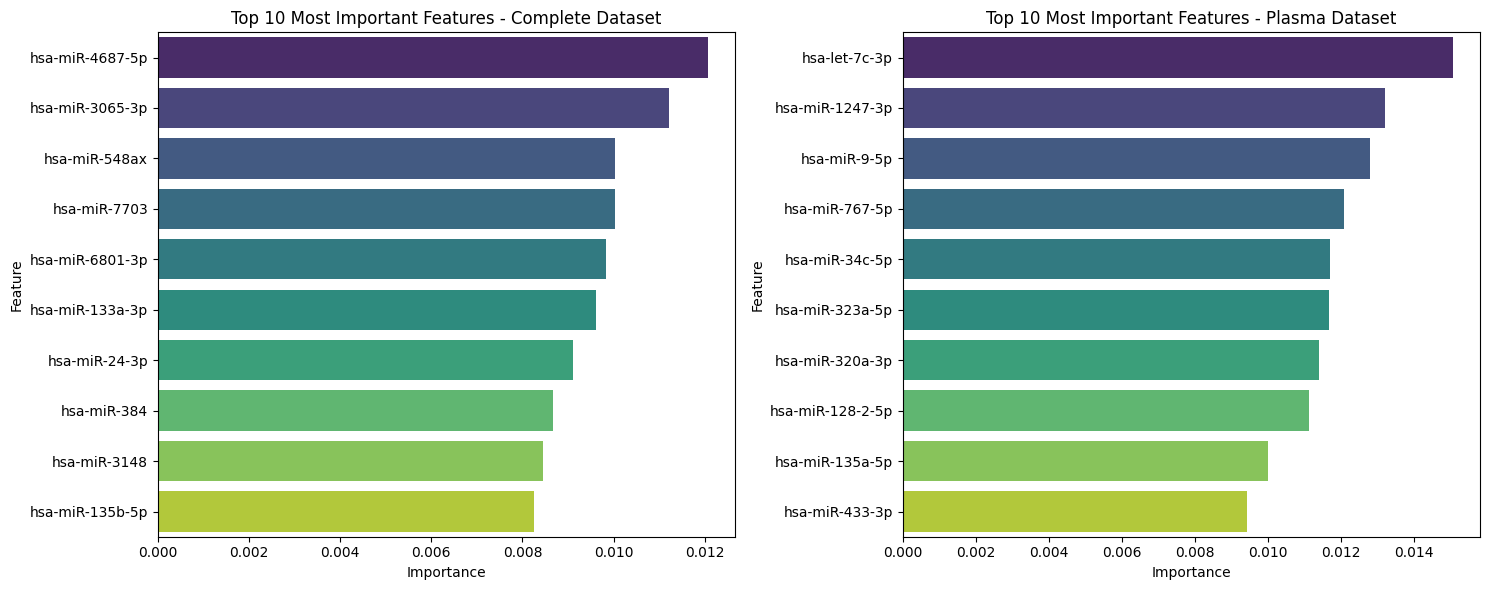

In [ ]:
def plot_comparison(feature_importance_1, feature_importance_2, columns_1, columns_2, dataset_1, dataset_2, top_n=10):
    # Ordenar las importancias y columnas de mayor a menor para el primer conjunto de datos
    sorted_indices_1 = feature_importance_1.argsort()[::-1]
    top_importances_1 = feature_importance_1[sorted_indices_1][:top_n]
    top_columns_1 = columns_1[sorted_indices_1][:top_n]

    # Ordenar las importancias y columnas de mayor a menor para el segundo conjunto de datos
    sorted_indices_2 = feature_importance_2.argsort()[::-1]
    top_importances_2 = feature_importance_2[sorted_indices_2][:top_n]
    top_columns_2 = columns_2[sorted_indices_2][:top_n]

    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=top_importances_1, y=top_columns_1, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Most Important Features - {dataset_1}')

    plt.subplot(1, 2, 2)
    sns.barplot(x=top_importances_2, y=top_columns_2, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Most Important Features - {dataset_2}')

    plt.tight_layout()
    plt.show()

# Visualizar la comparación de características más importantes entre los conjuntos de datos completo y de plasma
plot_comparison(importances_complete, importances_plasma, X_train_completo.columns, X_train_plasma.columns, 'Complete Dataset', 'Plasma Dataset')


In [ ]:
def find_common_features(importance_1, importance_2, columns_1, columns_2, threshold=0.05):
    # Obtener las características más importantes en cada conjunto de datos
    top_features_1 = set(columns_1[importance_1 > threshold])
    top_features_2 = set(columns_2[importance_2 > threshold])

    # Encontrar las características comunes
    common_features = top_features_1.intersection(top_features_2)
    return common_features

# Encontrar las características comunes entre los conjuntos de datos completo y de plasma
common_features = find_common_features(importances_complete, importances_plasma, X_train_completo.columns, X_train_plasma.columns)

# Mostrar las características comunes
print("Características comunes con alto nivel de importancia en ambos conjuntos de datos:")
for feature in common_features:
    print(feature)


Características comunes con alto nivel de importancia en ambos conjuntos de datos:


###5 mas importantes y analisis

In [ ]:
def select_top_features(importances, columns, top_n=5):
    # Ordenar las importancias y columnas de mayor a menor
    sorted_indices = importances.argsort()[::-1]
    top_importances = importances[sorted_indices][:top_n]
    top_columns = columns[sorted_indices][:top_n]
    return top_columns


In [ ]:
# Seleccionar las cinco características más importantes para el conjunto de datos completo
top_features_complete = select_top_features(importances_complete, X_train_completo.columns, top_n=5)
print("Top 5 características más importantes del conjunto de datos completo:")
print(top_features_complete)

# Seleccionar las cinco características más importantes para el conjunto de datos de plasma
top_features_plasma = select_top_features(importances_plasma, X_train_plasma.columns, top_n=5)
print("\nTop 5 características más importantes del conjunto de datos de plasma:")
print(top_features_plasma)


Top 5 características más importantes del conjunto de datos completo:
Index(['hsa-miR-4687-5p', 'hsa-miR-3065-3p', 'hsa-miR-548ax', 'hsa-miR-7703',
       'hsa-miR-6801-3p'],
      dtype='object')

Top 5 características más importantes del conjunto de datos de plasma:
Index(['hsa-let-7c-3p', 'hsa-miR-1247-3p', 'hsa-miR-9-5p', 'hsa-miR-767-5p',
       'hsa-miR-34c-5p'],
      dtype='object')


In [ ]:
df_procesado.head()

,Instrument,Sex,Fluid,Healthy,Cancer,Exosome,Desc,index,hsa-miR-6850-3p,hsa-miR-4761-3p,...,hsa-miR-2467-3p,hsa-miR-6512-5p,hsa-miR-6718-5p,hsa-miR-520h,hsa-miR-6796-5p,hsa-miR-1245b-5p,hsa-miR-5586-3p,hsa-miR-29a-5p,hsa-miR-1304-3p,hsa-miR-384
14,Illumina HiScanSQ,0,plasma,False,False,False,Healthy Control,14,0,0,...,0,0,0,0,0,0,0,0,9,0
15,Illumina HiScanSQ,0,plasma,False,False,False,Healthy Control,15,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Illumina HiScanSQ,0,plasma,False,False,False,Healthy Control,16,0,0,...,0,0,0,0,0,0,0,0,9,0
17,Illumina HiScanSQ,0,plasma,False,False,False,Healthy Control,17,0,0,...,0,0,0,0,0,0,0,0,0,0
18,Illumina HiScanSQ,0,plasma,False,False,False,Healthy Control,18,0,0,...,0,0,0,0,0,0,0,0,51,0


In [ ]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ['Instrument', 'Sex', 'Fluid', 'Healthy', 'Cancer', 'Exosome', 'Desc',
                      'hsa-miR-4687-5p', 'hsa-miR-3065-3p', 'hsa-miR-548ax', 'hsa-miR-7703', 'hsa-miR-6801-3p',
                      'hsa-let-7c-3p', 'hsa-miR-1247-3p', 'hsa-miR-9-5p', 'hsa-miR-767-5p', 'hsa-miR-34c-5p']

df_relevantes = df_procesado[columnas_relevantes].copy()


<ipython-input-77-b0c1c02b0323>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_relevantes, x='Sex', y='hsa-miR-4687-5p', palette='viridis')


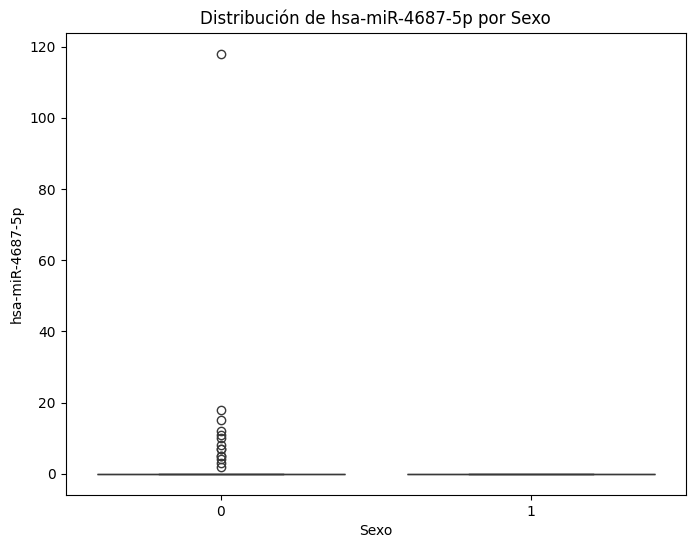

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_relevantes, x='Sex', y='hsa-miR-4687-5p', palette='viridis')
plt.title('Distribución de hsa-miR-4687-5p por Sexo')
plt.xlabel('Sexo')
plt.ylabel('hsa-miR-4687-5p')
plt.show()


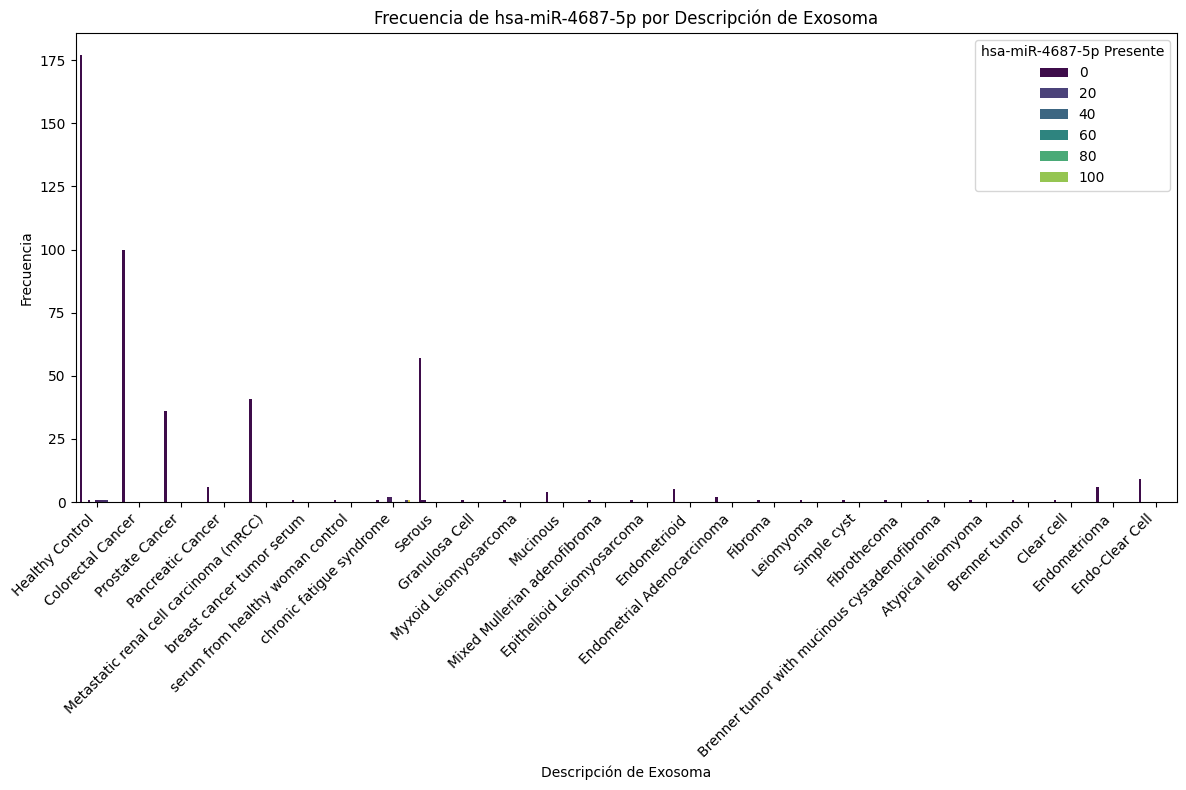

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
sns.countplot(data=df_relevantes, x='Desc', hue='hsa-miR-4687-5p', palette='viridis')
plt.title('Frecuencia de hsa-miR-4687-5p por Descripción de Exosoma')
plt.xlabel('Descripción de Exosoma')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
plt.legend(title='hsa-miR-4687-5p Presente', loc='upper right')
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()


<ipython-input-84-99398da9dd00>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_por_desc, x='Cancer', y='hsa-miR-4687-5p', palette='viridis')


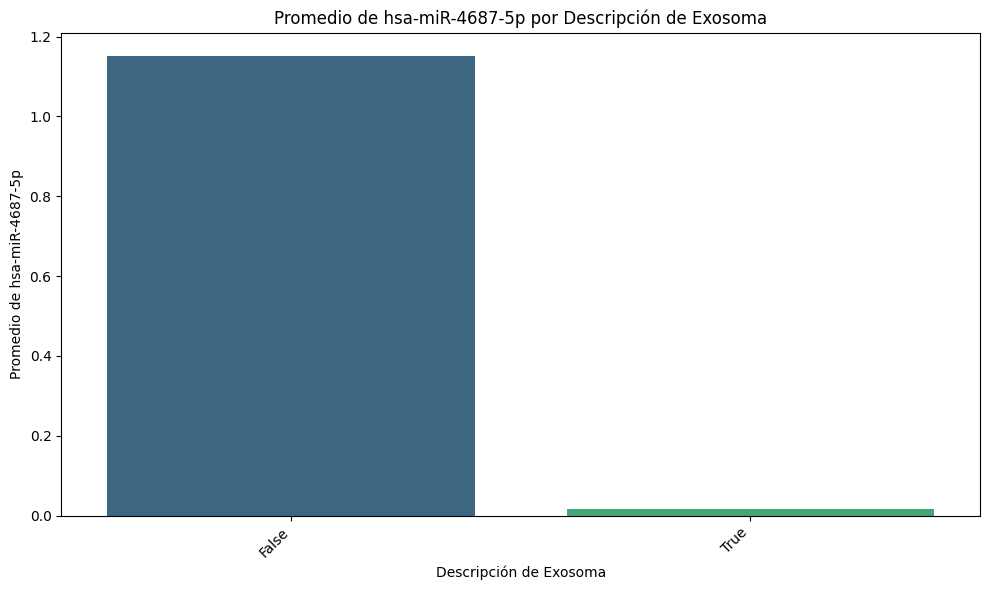

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el promedio de la cantidad de 'hsa-miR-4687-5p' para cada categoría de 'Exosome Desc'
promedio_por_desc = df_relevantes.groupby('Cancer')['hsa-miR-4687-5p'].mean().reset_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=promedio_por_desc, x='Cancer', y='hsa-miR-4687-5p', palette='viridis')
plt.title('Promedio de hsa-miR-4687-5p por Descripción de Exosoma')
plt.xlabel('Descripción de Exosoma')
plt.ylabel('Promedio de hsa-miR-4687-5p')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()


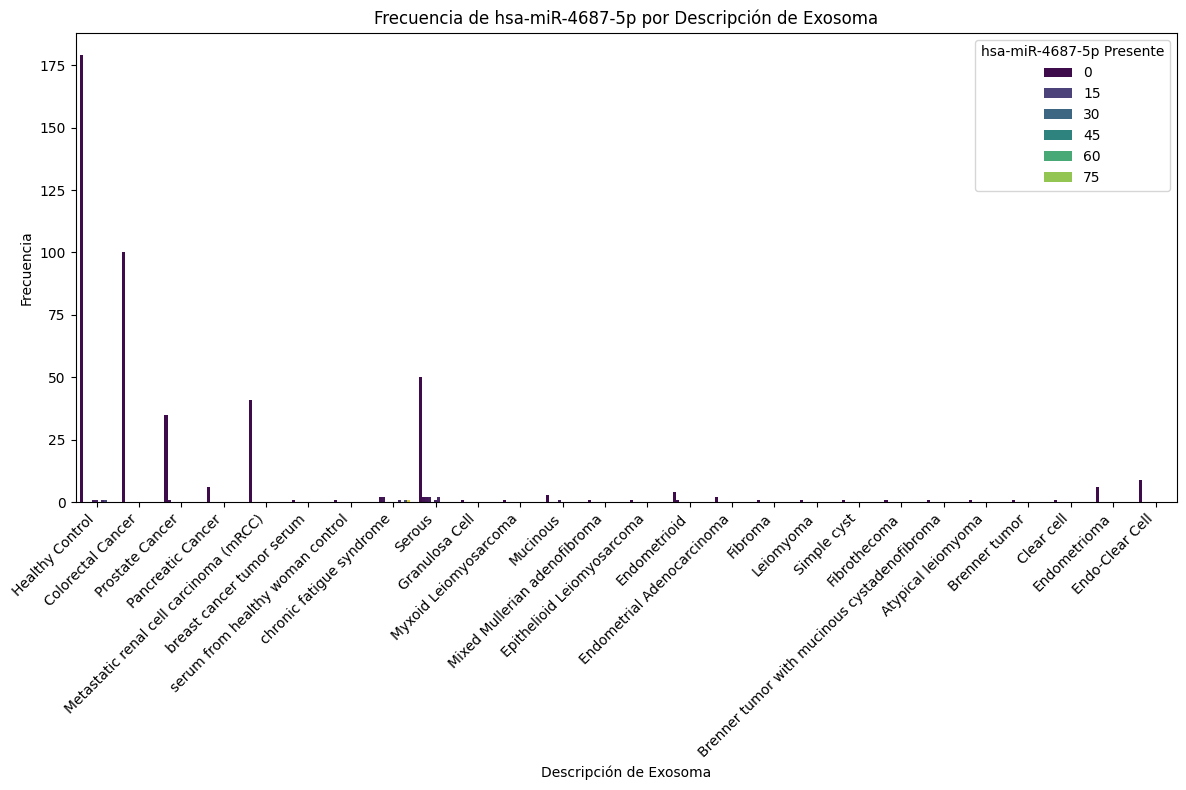

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
sns.countplot(data=df_relevantes, x='Desc', hue='hsa-miR-3065-3p', palette='viridis')
plt.title('Frecuencia de hsa-miR-4687-5p por Descripción de Exosoma')
plt.xlabel('Descripción de Exosoma')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
plt.legend(title='hsa-miR-4687-5p Presente', loc='upper right')
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()
